# <font color='aqua'>**Análisis Exploratorio de Datos (EDA)**


La etapa exploratoria de datos es es de caracter vital, cómo seres humanos un simple vistazo a la data no proporciona mucha informaación, para ello debemos recurir a la valiosa herramienta matematica que es la estadistica, adicional a ella debemos apoyarnos en graficos ya que nuestro cerebro la lleva muy bien con la parte visual. Es por ello que en el EDA se va a ver reflejado el trabajo de dichas herramientas, no todas, solo las pertinentes que brinden información acerca de la data, va en nuestra expertise cómo Data Analyst filtrar dichas herramientas y los resultados que arrojan.

En este proyecto, el EDA permitirá investigar el conjunto de datos provenientes del Ente Nacional de Telecomunicaciones (**ENACOM**) con la finalidad de reconocer el comportamiento de este sector a nivel nacional y así aconsejar a la empresa que ha contratado mis servicios.

**El análisis exhaustivo de los datos posibilitará orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.**

Este EDA en específico los objetivos principales son:
* Identificar Outliers, Duplicados y Faltantes.
* Gráficas pertinentes.
* Análisis univariable y multivariable.

In [1]:
#Se importan las librerías necesarias
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

In [2]:
# Para permitir una visualización limpia de las ejecuciones, silenciamos warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Carga de Datos y Datos Faltantes
Posterior a la visualización de los archivos de Excel con la data se decide trabajar con los datos de los archivos 'internet.xlsx' y 'mapa_conectividad.xlsx', los cuales se descargan de la página de ENACOM y se almacenan de manera local. El dataset de internet es un libro de Excel con 15 hojas por ello se procede a crear una función para calcular los valores faltantes para cada una de ellas.

In [20]:
def calcular_porcentaje_nulos(ruta_archivo):
    '''La función recibe como parametro la ruta de un archivo xls y retorna el porcentaje
        de nulos en cada una de las hojas, convirtiendo en DataFrame cada una de ellas y usando 
        las funciones de Pandas correspondientes.
        Parameters:
          ruta_archivo (str): la ruta especifica del archivo a analizar nulos.
        Return:
          porcentaje_nulos (pd.DataFrame): dataframe con nombre de hoja y correspondiente porcentaje de nulos
    '''
    # Cargar el archivo Excel
    xls = pd.ExcelFile(ruta_archivo)

    # Crear un diccionario para almacenar los resultados
    porcentaje_nulos = {}

    # Iterar sobre cada hoja en el archivo
    for hoja in xls.sheet_names:
        # Leer la hoja actual
        df = pd.read_excel(xls, hoja)

        # Calcular el porcentaje de valores nulos
        porcentaje_nulo = df.isnull().mean().mean() * 100

        # Almacenar el resultado en el diccionario
        porcentaje_nulos[hoja] = porcentaje_nulo

    return pd.DataFrame(list(porcentaje_nulos.items()), columns=['Hoja', 'Porcentaje Nulos'])


Usamos la función y visualizamos.

In [16]:
calcular_porcentaje_nulos('./datasets/Internet.xlsx')

,Hoja,Porcentaje Nulos
0,Acc_vel_loc_sinrangos,91.850440
1,Velocidad_sin_Rangos,0.159171
2,Accesos_tecnologia_localidad,2.570222
3,Velocidad % por prov,0.000000
4,Totales VMD,0.000000
5,Totales Accesos Por Tecnología,0.000000
6,Accesos Por Tecnología,0.180302
7,Penetración-poblacion,0.000000
8,Penetracion-hogares,0.000000
9,Penetracion-totales,0.000000


Es muy evidente que de la hoja Acc_vel_loc_sinrangos es un dataset descartable debido al alto porcentaje de faltantes, por otro lado vamos a trabajar con aquellas que se nos presentan con porcentaje cero de faltantes.

## Hoja Nro 3: 'Velocidad % por prov'

Distribución porcentual de la velocidad de conexión a internet por provincia. Se crea una función para el cargue especifico de una hoja para un libro de excel.

In [18]:
def cargar_hoja_excel(ruta_archivo, nombre_hoja):
    '''La función cargar_hoja_excel permite leer datos desde una hoja específica de un libro de excel
       para convertirlo, almacenarlo y devorverlo en un dataframe.
       Parameters:
         ruta_archivo (str): String que contiene la ruta del archivo excel de donde se quiere extraer los datos.
         nombre_hoja (str): String con el nombre de la hoja dentro del excel.
      Return: pd.DataFrame
    '''

    # Cargar la hoja específica en un DataFrame
    return pd.read_excel(ruta_archivo, sheet_name=nombre_hoja)

In [24]:
# Uso de la función
ruta_archivo = './datasets/Internet.xlsx'
nombre_hoja = 'Velocidad % por prov'

# Cargar la hoja en un DataFrame
df3 = cargar_hoja_excel(ruta_archivo, nombre_hoja)
df3.shape

(984, 4)

In [25]:
# Mostrar las primeras filas del Dataframe
df3.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


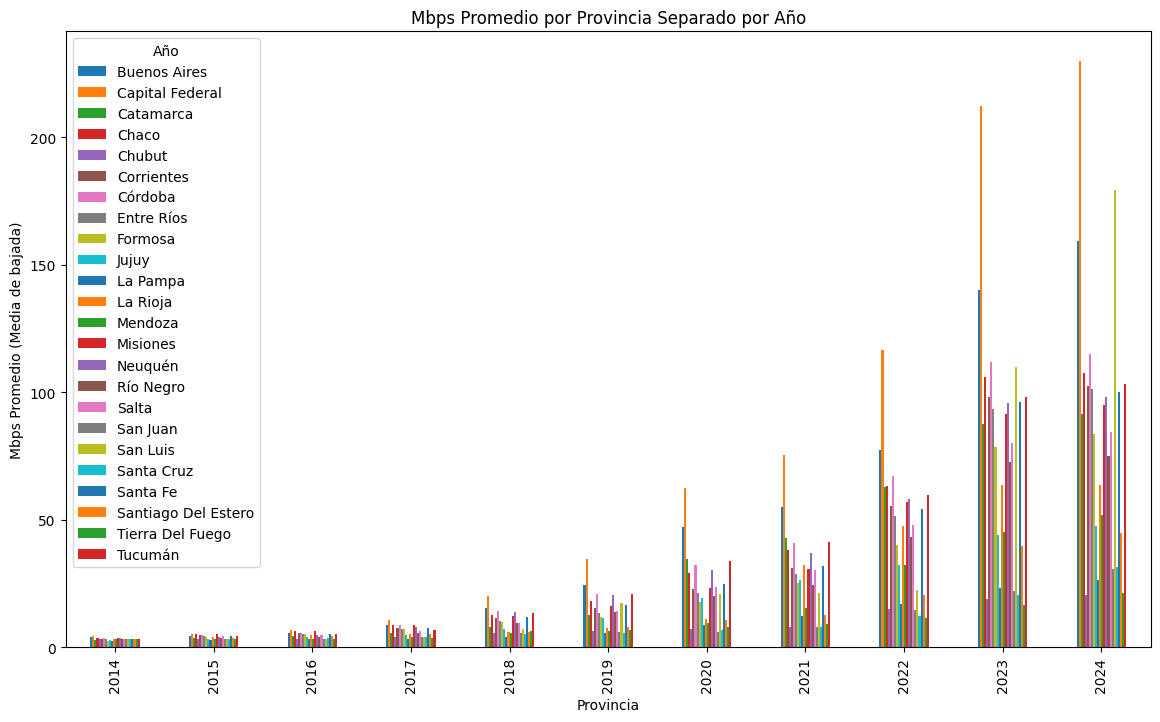

In [26]:
# Calcular el Mbps promedio por provincia y año
promedio_por_provincia_ano = df3.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()

# Opcional: Crear un gráfico de barras apiladas para visualizar el promedio por provincia y año
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Mbps Promedio por Provincia Separado por Año')
plt.xlabel('Provincia')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.legend(title='Año')
plt.show()

In [27]:
promedio_por_provincia_ano

Provincia,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
Año,,,,,,,,,,,,,,,,,,,,,
2014,3.938247,4.373310,2.992319,3.528954,3.168178,3.450659,3.674289,3.419838,2.726423,2.879411,...,3.701922,3.451383,3.491302,3.472642,3.503414,3.318623,3.403850,3.144248,3.465673,3.442199
2015,4.593012,5.476086,3.793736,5.347374,3.248158,4.949586,4.699287,4.667971,3.993135,3.476996,...,4.139162,3.689449,4.334050,3.479651,3.502364,3.477299,4.434062,3.826314,3.470985,4.458127
2016,5.668444,6.990348,4.544844,6.521145,3.366674,5.791885,5.802245,5.402374,5.255818,4.038457,...,5.064378,4.084033,4.941249,3.488525,3.502683,3.521256,5.438558,4.505186,3.476770,5.369367
2017,8.818755,10.757327,5.780035,8.796215,3.944310,7.764092,8.743239,7.132161,7.276009,5.065888,...,7.904944,5.680900,6.419118,4.066628,4.060311,4.003025,7.803124,5.337768,3.908027,6.864996
2018,15.648091,20.315596,7.935600,12.832643,5.727610,11.407077,14.324824,10.402495,9.791798,7.315785,...,13.972737,9.759326,9.460211,5.787413,7.357230,5.216951,12.114688,6.062078,6.283818,13.675341
2019,24.643270,34.494651,12.736430,18.206025,6.476644,15.459516,20.880516,13.638817,12.102717,11.390322,...,20.723954,13.819297,14.188972,6.009047,17.254677,5.503428,16.693560,8.174950,6.660451,21.074250
2020,47.307067,62.580959,34.562176,29.287277,7.376924,22.996883,32.253540,21.491066,17.637198,19.281437,...,30.559300,20.363599,23.641795,6.196583,21.028222,6.787961,24.833786,10.642985,8.133170,34.057028
2021,55.001940,75.424761,42.991246,38.119721,8.116989,31.073697,41.011903,28.602166,25.098427,26.428721,...,37.195744,24.568897,30.427129,7.999326,21.466175,7.953544,31.997208,12.874146,9.385845,41.384712
2022,77.300000,116.525000,63.025000,63.420000,14.950000,55.302500,67.122500,51.395000,40.282500,32.207500,...,58.190000,43.447500,48.185000,14.665000,22.567500,12.407500,54.087500,20.732500,11.547500,59.755000


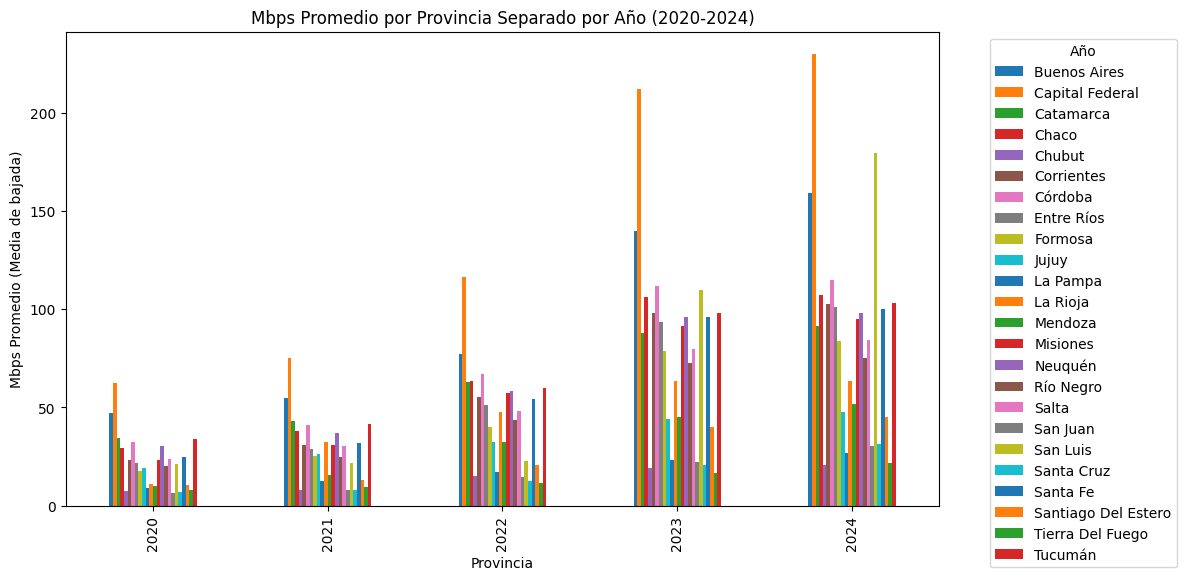

In [28]:
# Filtrar los datos para los años específicos
años_filtrados = [2020, 2021, 2022, 2023, 2024]
df_filtrado = df3[df3['Año'].isin(años_filtrados)]

# Calcular el Mbps promedio por provincia y año
promedio_por_provincia_ano = df_filtrado.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()


# Crear el gráfico de barras para los años filtrados
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(12, 6))
# Configurar la leyenda fuera del gráfico, en la parte derecha
plt.title('Mbps Promedio por Provincia Separado por Año (2020-2024)')
plt.xlabel('Provincia')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar el layout para que se acomode todo correctamente
plt.tight_layout()
# Mostrar el gráfico
plt.show()

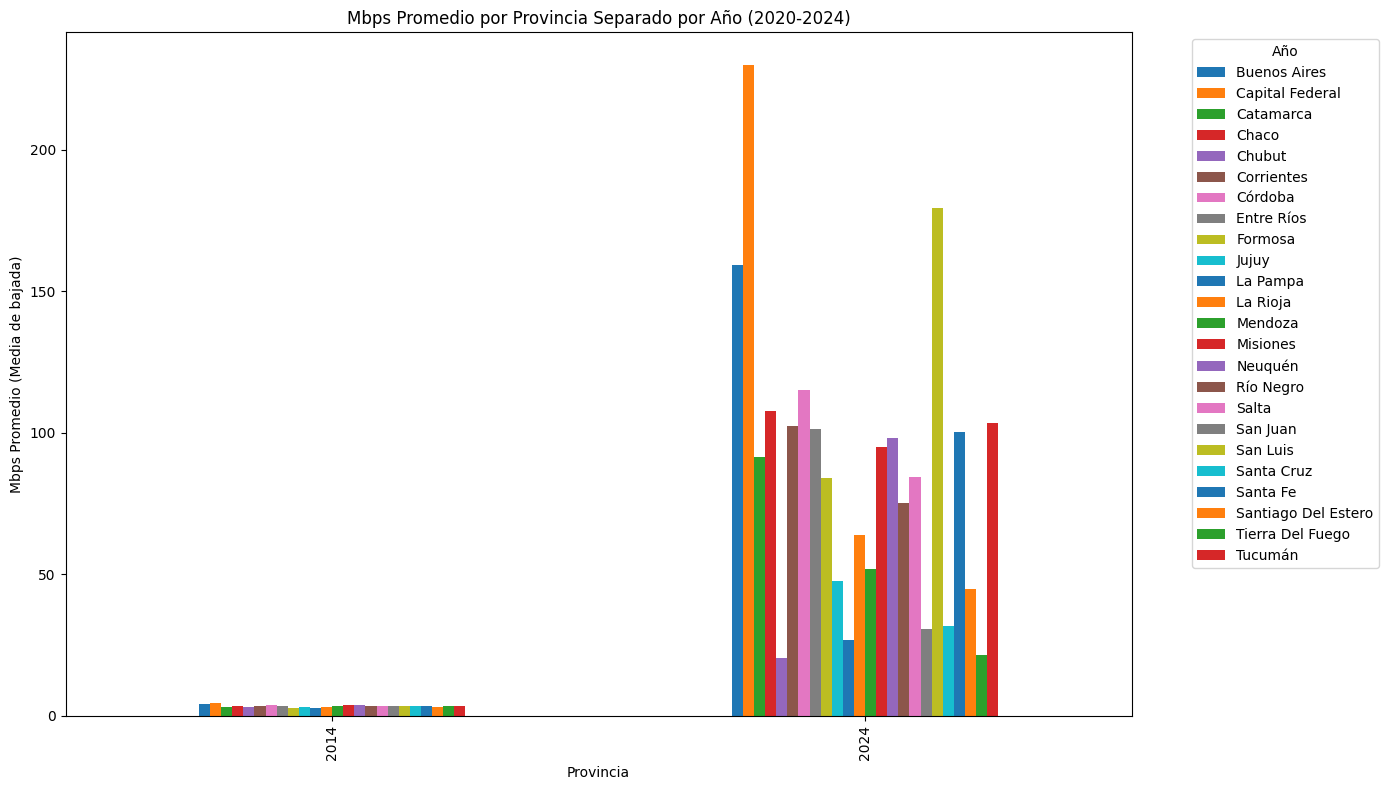

In [29]:
# Filtrar los datos para los años específicos
años_filtrados2 = [2014, 2024]
df_filtrado2 = df3[df3['Año'].isin(años_filtrados2)]

# Calcular el Mbps promedio por provincia y año
promedio_por_provincia_ano = df_filtrado2.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()


# Crear el gráfico de barras para los años filtrados
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(14, 8))
# Configurar la leyenda fuera del gráfico, en la parte derecha
plt.title('Mbps Promedio por Provincia Separado por Año (2020-2024)')
plt.xlabel('Provincia')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar el layout para que se acomode todo correctamente
plt.tight_layout()
# Mostrar el gráfico
plt.show()

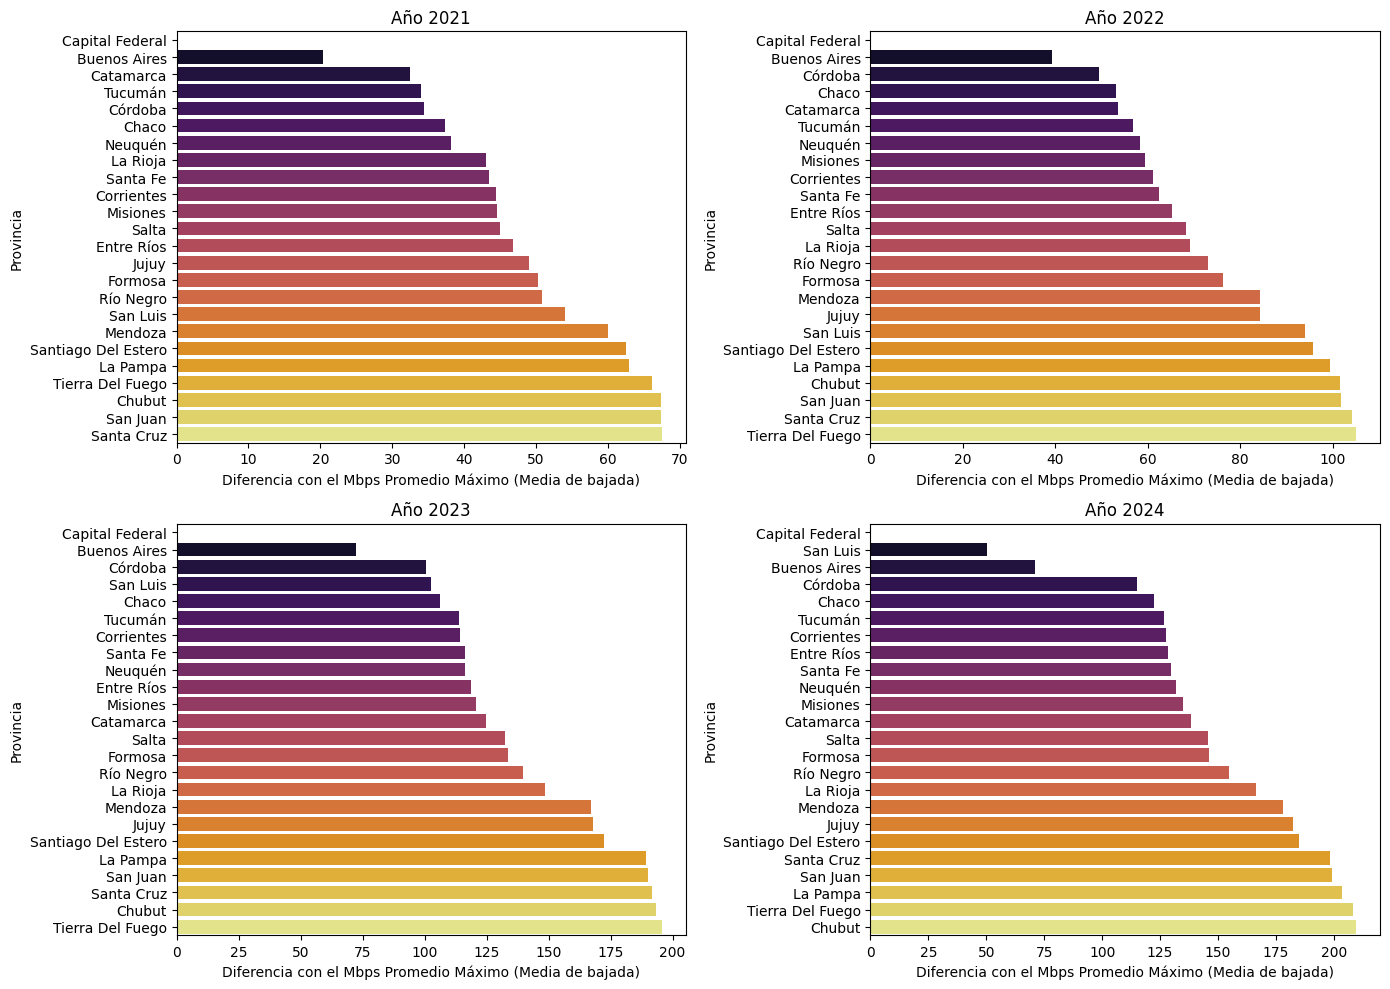

In [30]:
# Filtrar los datos para los años específicos
años_filtrados = [2021, 2022, 2023, 2024]
df_filtrado = df3[df3['Año'].isin(años_filtrados)]

# Crear figura y ejes para los gráficos distribuidos en 2 paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 panel

# Iterar sobre los años filtrados y crear gráficos por separado
for i, año in enumerate(años_filtrados):
    # Filtrar datos por año
    df_año = df_filtrado[df_filtrado['Año'] == año]

    # Calcular el Mbps promedio por provincia para el año específico
    promedio_por_provincia = df_año.groupby('Provincia')['Mbps (Media de bajada)'].mean()

    # Encontrar el Mbps promedio máximo
    max_mbps = promedio_por_provincia.max()

    # Calcular la diferencia de cada provincia respecto al máximo
    diferencia_max_mbps = max_mbps - promedio_por_provincia

    # Crear un DataFrame con las diferencias
    diferencia_max_mbps_df = diferencia_max_mbps.reset_index()
    diferencia_max_mbps_df.columns = ['Provincia', 'Diferencia con el Mbps Máximo']

    # Ordenar el DataFrame por la columna de diferencias de menor a mayor
    diferencia_max_mbps_df = diferencia_max_mbps_df.sort_values(by='Diferencia con el Mbps Máximo', ascending=True)

    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de barras ordenado para el año específico
    sns.barplot(x='Diferencia con el Mbps Máximo', y='Provincia', data=diferencia_max_mbps_df, palette='inferno', ax=ax)
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Diferencia con el Mbps Promedio Máximo (Media de bajada)')
    ax.set_ylabel('Provincia')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

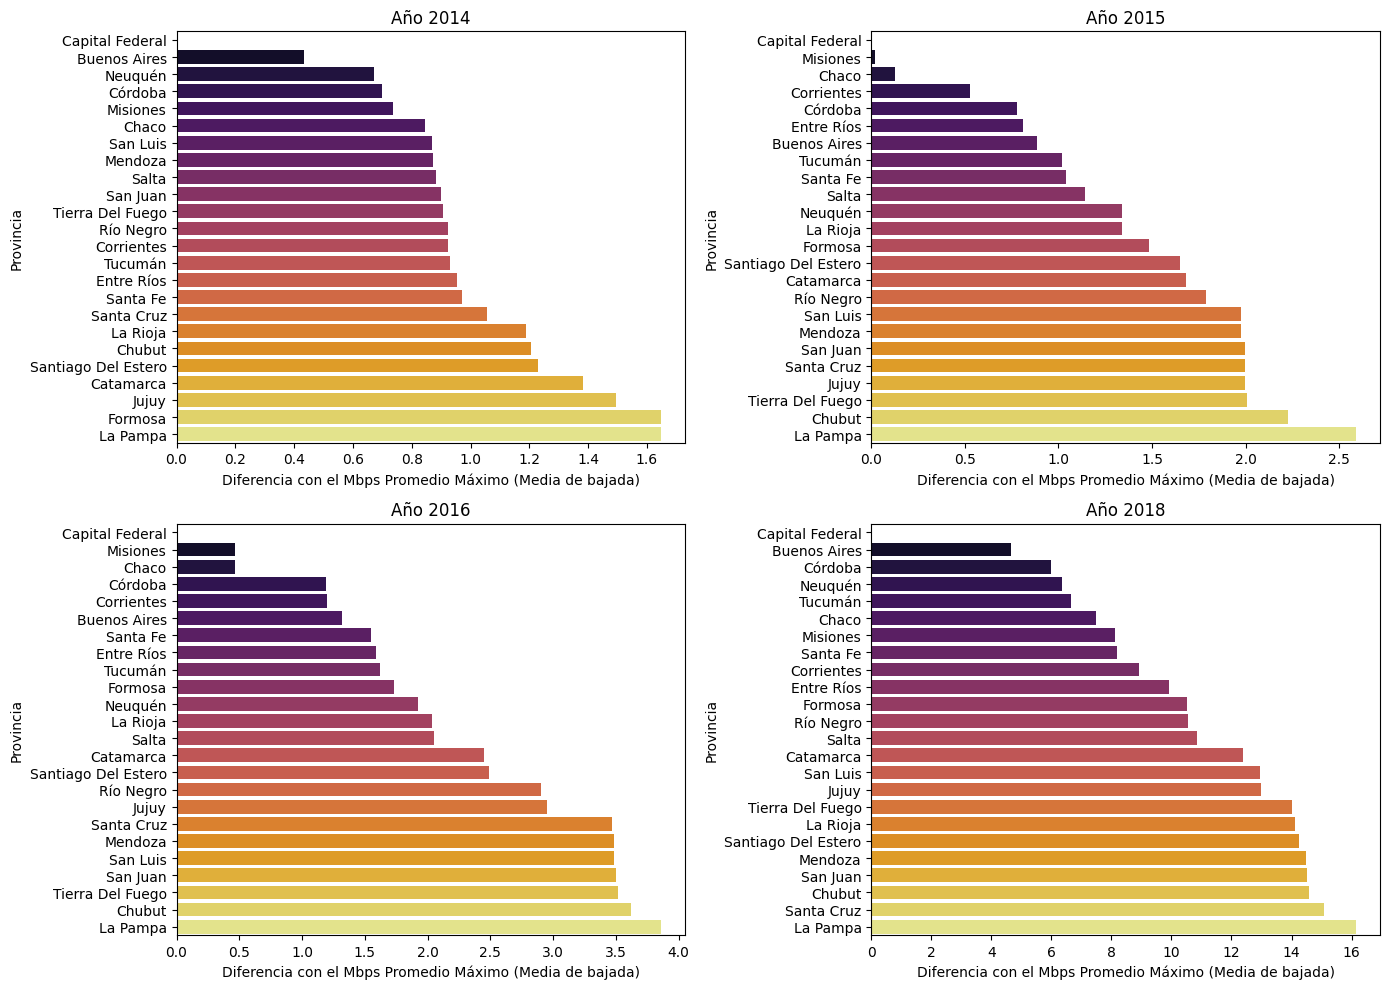

In [31]:
# Filtrar los datos para los años específicos
años_filtrados4 = [2014, 2015, 2016, 2018]
df_filtrado4 = df3[df3['Año'].isin(años_filtrados4)]

# Crear figura y ejes para los gráficos distribuidos en 2 paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 panel

# Iterar sobre los años filtrados y crear gráficos por separado
for i, año in enumerate(años_filtrados4):
    # Filtrar datos por año
    df_año4 = df_filtrado4[df_filtrado4['Año'] == año]

    # Calcular el Mbps promedio por provincia para el año específico
    promedio_por_provincia4 = df_año4.groupby('Provincia')['Mbps (Media de bajada)'].mean()

    # Encontrar el Mbps promedio máximo
    max_mbps4 = promedio_por_provincia4.max()

    # Calcular la diferencia de cada provincia respecto al máximo
    diferencia_max_mbps4 = max_mbps4 - promedio_por_provincia4

    # Crear un DataFrame con las diferencias
    diferencia_max_mbps4_df = diferencia_max_mbps4.reset_index()
    diferencia_max_mbps4_df.columns = ['Provincia', 'Diferencia con el Mbps Máximo']

    # Ordenar el DataFrame por la columna de diferencias de menor a mayor
    diferencia_max_mbps4_df = diferencia_max_mbps4_df.sort_values(by='Diferencia con el Mbps Máximo', ascending=True)

    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de barras ordenado para el año específico
    sns.barplot(x='Diferencia con el Mbps Máximo', y='Provincia', data=diferencia_max_mbps4_df, palette='inferno', ax=ax)
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Diferencia con el Mbps Promedio Máximo (Media de bajada)')
    ax.set_ylabel('Provincia')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

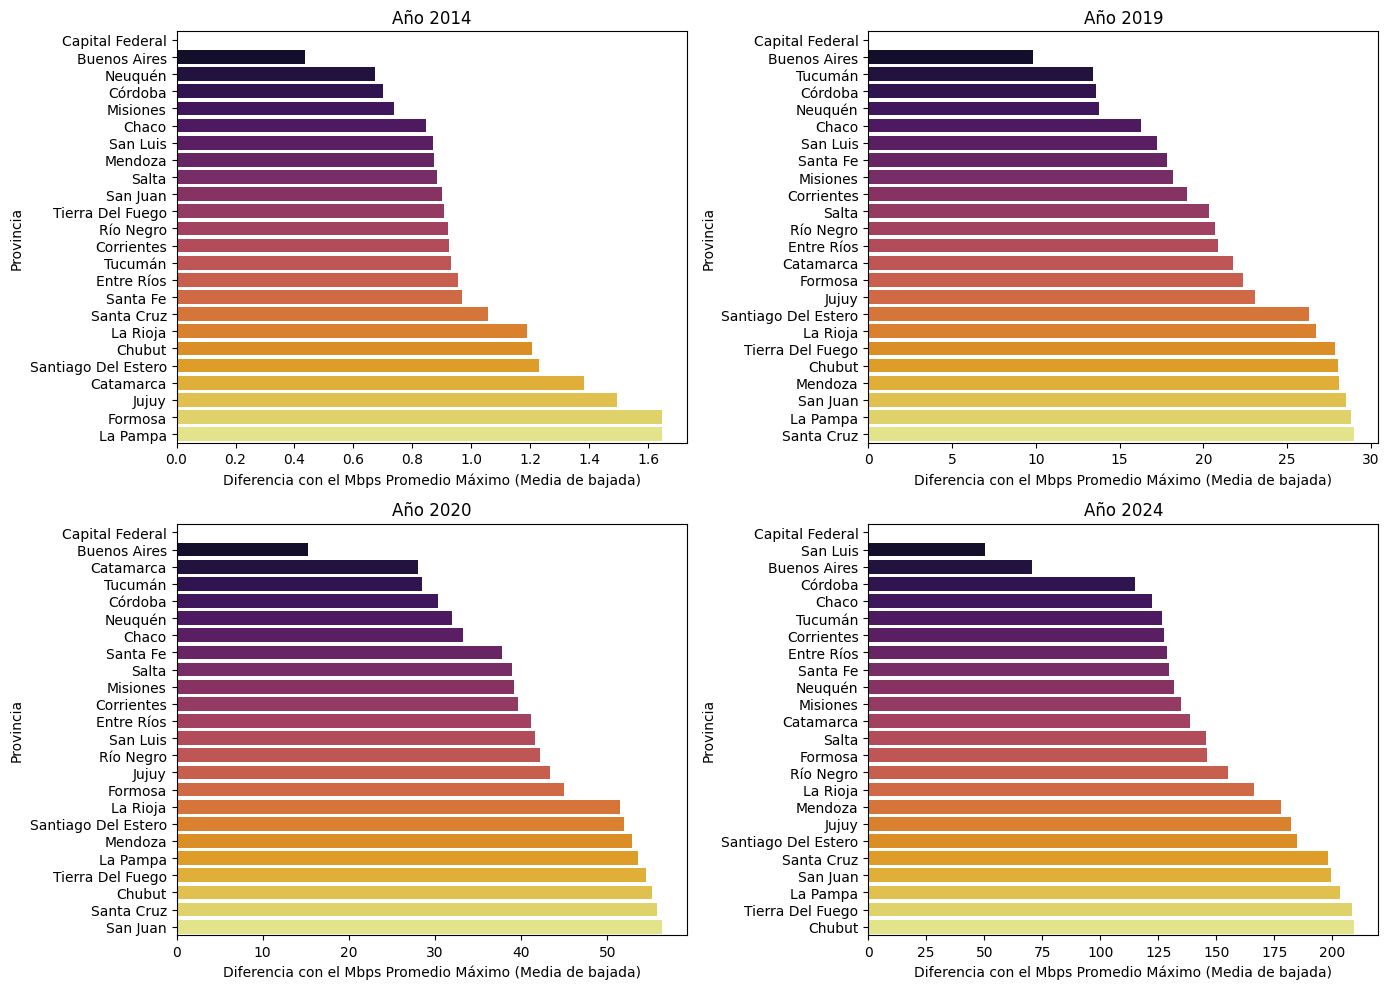

In [33]:
# Filtrar los datos para los años específicos
años_filtrados5 = [2014,2019, 2020, 2024]
df_filtrado5 = df3[df3['Año'].isin(años_filtrados5)]

# Crear figura y ejes para los gráficos distribuidos en 2 paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 panel

# Iterar sobre los años filtrados y crear gráficos por separado
for i, año in enumerate(años_filtrados5):
    # Filtrar datos por año
    df_año5 = df_filtrado5[df_filtrado5['Año'] == año]

    # Calcular el Mbps promedio por provincia para el año específico
    promedio_por_provincia5 = df_año5.groupby('Provincia')['Mbps (Media de bajada)'].mean()

    # Encontrar el Mbps promedio máximo
    max_mbps5 = promedio_por_provincia5.max()

    # Calcular la diferencia de cada provincia respecto al máximo
    diferencia_max_mbps5 = max_mbps5 - promedio_por_provincia5

    # Crear un DataFrame con las diferencias
    diferencia_max_mbps5_df = diferencia_max_mbps5.reset_index()
    diferencia_max_mbps5_df.columns = ['Provincia', 'Diferencia con el Mbps Máximo']

    # Ordenar el DataFrame por la columna de diferencias de menor a mayor
    diferencia_max_mbps5_df = diferencia_max_mbps5_df.sort_values(by='Diferencia con el Mbps Máximo', ascending=True)

    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de barras ordenado para el año específico
    sns.barplot(x='Diferencia con el Mbps Máximo', y='Provincia', data=diferencia_max_mbps5_df, palette='inferno', ax=ax)
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Diferencia con el Mbps Promedio Máximo (Media de bajada)')
    ax.set_ylabel('Provincia')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Observaciones y Conclusiones

Los gráficos presentan la variación en el Mbps promedio de bajada en relación con el máximo alcanzado en cada provincia durante los años 2014, 2019, 2020 y 2024. Este análisis proporciona una visión clara sobre la evolución de la calidad de la conexión a internet en las diferentes regiones del país.

* **Año 2014**

En 2014, la brecha en la calidad de conexión a internet es relativamente pequeña. Capital Federal y Buenos Aires se destacan por tener la menor diferencia entre el Mbps promedio y el máximo, lo que indica una calidad de conexión superior en estas áreas. Por otro lado, provincias como La Pampa, Formosa y Jujuy presentan las mayores disparidades, lo que sugiere una necesidad urgente de mejorar la infraestructura y servicios de internet en estas regiones.

* **Año 2019**

En 2019, se observa un incremento notable en la diferencia entre el Mbps promedio y el máximo en la mayoría de las provincias. Este cambio refleja no solo un avance en las conexiones de las provincias más favorecidas, sino también un aumento de las desigualdades regionales. Capital Federal y Buenos Aires continúan liderando, manteniendo la menor diferencia, mientras que provincias como Santa Cruz, La Pampa y Mendoza todavía presentan discrepancias significativas que indican la necesidad de inversión en sus infraestructuras de telecomunicaciones.

* **Año 2020**

Para 2020, las disparidades en la calidad de conexión persisten, aunque se evidencia una reducción en la brecha en varias provincias. Esto indica avances en la calidad de las conexiones, aunque la mejora no es uniforme. Capital Federal sigue destacándose como la región con la mejor calidad de conexión, mientras que provincias como Santa Cruz y Chubut presentan las diferencias más pronunciadas, sugiriendo que aún queda trabajo por hacer para alcanzar una equidad en el acceso a internet en todo el país.

* **Año 2024**

En 2024, el panorama ha mejorado considerablemente en muchas provincias, aunque algunas diferencias significativas todavía persisten. Capital Federal, San Luis y Buenos Aires muestran las menores discrepancias, reafirmándose como líderes en calidad de conexión. Sin embargo, provincias como Chubut y San Juan evidencian las mayores diferencias, lo que pone de manifiesto la necesidad de una mayor atención y recursos para mejorar la infraestructura de telecomunicaciones en estas áreas.

### Conclusión

A lo largo de la última década, Argentina ha experimentado mejoras significativas en la calidad de su conexión a internet, aunque las disparidades regionales siguen siendo un desafío. Mientras que Capital Federal y Buenos Aires continúan siendo referentes en calidad de conexión, provincias como Chubut y San Juan requieren inversiones adicionales en infraestructura para cerrar la brecha digital y garantizar un acceso equitativo a internet para todos los ciudadanos.

## Hoja Nro 7: 'Accesos Por Tecnología'
Accesos a internet por tipo de tecnología.



In [35]:
nombre_hoja = 'Accesos Por Tecnología'
# Cargar la hoja en un DataFrame
df7 = cargar_hoja_excel(ruta_archivo, nombre_hoja)
df7.head()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [36]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


### Se eliminan datos nulos

In [37]:
#Eliminar datos nulos
df7.dropna(inplace=True)

###  Luego de la eliminación de los datos nulos se hará un análisis exhaustivo de los datos para encontrar posibles inconsistencias

In [38]:
# 1. Verificación de tipos de datos
print("Tipos de datos:")
print(df7.dtypes)

# 2. Valores nulos o faltantes
print("\nValores nulos o faltantes:")
print(df7.isnull().sum())

# 3. Verificación de totales
df7['Calculated_Total'] = df7['ADSL'] + df7['Cablemodem'] + df7['Fibra óptica'] + df7['Wireless'] + df7['Otros']
df7['Total_Mismatch'] = df7['Calculated_Total'] != df7['Total']
inconsistencias_total = df7[df7['Total_Mismatch']]

print("\nInconsistencias en los totales:")
print(inconsistencias_total[['Año', 'Trimestre', 'Provincia', 'Total', 'Calculated_Total']])

# 4. Duplicados
duplicados = df7.duplicated()
if duplicados.any():
    print("\nFilas duplicadas:")
    print(df7[duplicados])
else:
    print("\nNo hay filas duplicadas.")

# 5. Valores fuera de rango (negativos)
columnas_numericas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
valores_fuera_de_rango = df7[(df7[columnas_numericas] < 0).any(axis=1)]

if not valores_fuera_de_rango.empty:
    print("\nValores fuera de rango (negativos):")
    print(valores_fuera_de_rango)
else:
    print("\nNo hay valores fuera de rango (negativos).")


Tipos de datos:
Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Valores nulos o faltantes:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Inconsistencias en los totales:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Total, Calculated_Total]
Index: []

No hay filas duplicadas.

No hay valores fuera de rango (negativos).


In [39]:
# Convertir la columna 'Año' a   dato numérico
df7['Año'] = df7['Año'].replace('[^0-9]', '', regex=True).astype(int)

# Verificar el cambio
print(df7.dtypes)

Año                   int64
Trimestre            object
Provincia            object
ADSL                float64
Cablemodem          float64
Fibra óptica        float64
Wireless            float64
Otros               float64
Total               float64
Calculated_Total    float64
Total_Mismatch         bool
dtype: object


In [40]:
# Eliminar las columnas 'Calculated_Total' y 'Total_Mismatch'
df7 = df7.drop(columns=['Calculated_Total', 'Total_Mismatch'], errors='ignore')

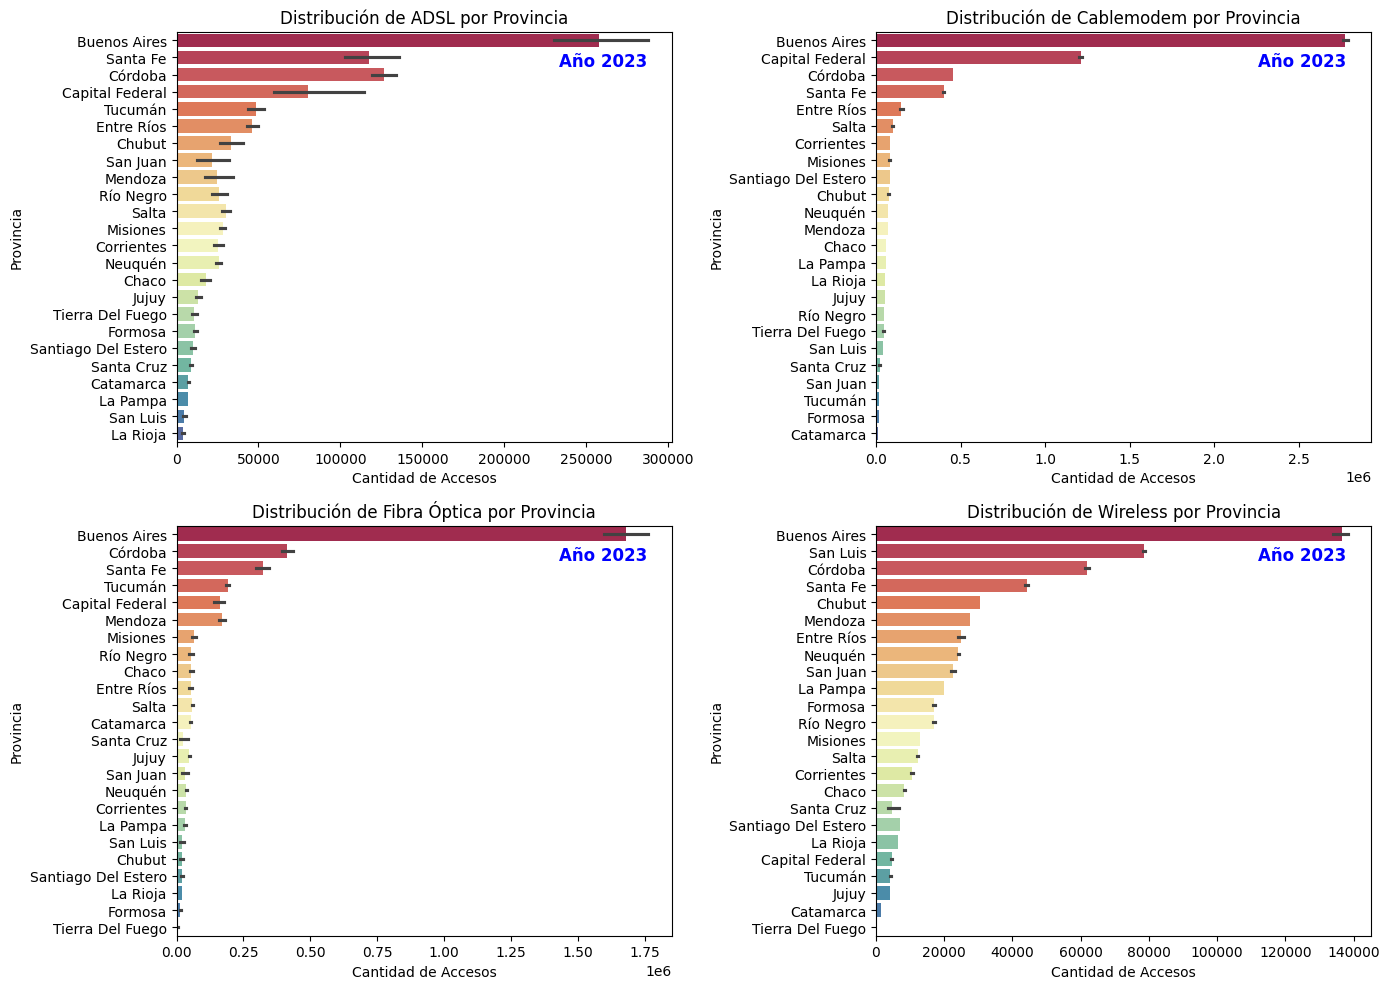

In [41]:
# Filtrar el DataFrame para incluir solo el año 2023
df_2023 = df7[df7['Año'] == 2023]

# Crear una figura con dos paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Definir los tipos de conexiones
tipos_conexiones = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
titulos = ['Distribución de ADSL por Provincia', 'Distribución de Cablemodem por Provincia',
           'Distribución de Fibra Óptica por Provincia', 'Distribución de Wireless por Provincia']

# Iterar sobre cada tipo de conexión y crear gráficos de barras
for i, tipo in enumerate(tipos_conexiones):
    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Ordenar los datos por el tipo de conexión en orden descendente
    df_sorted = df_2023.sort_values(by=tipo, ascending=False)

    # Crear el gráfico de barras para el tipo de conexión actual
    sns.barplot(x=tipo, y='Provincia', data=df_sorted, ax=ax, palette='Spectral')

    # Configurar el título y las etiquetas
    ax.set_title(titulos[i])
    ax.set_xlabel('Cantidad de Accesos')
    ax.set_ylabel('Provincia')

    # Agregar una leyenda o anotación para el año 2023
    ax.text(0.95, 0.95, 'Año 2023', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=12, color='blue', weight='bold')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Conclusiones y Observaciones sobre el Análisis de Conexiones en 2023

#### Gráfico de ADSL

1. **Provincias Destacadas:** Buenos Aires, Santa Fe y Córdoba se destacan con la mayor cantidad de accesos ADSL, con Buenos Aires manteniendo una ventaja considerable sobre las demás. Esto refleja un despliegue más robusto de la infraestructura necesaria en esta provincia, además de una mayor demanda de servicios.
   
2. **Provincias con Menores Accesos:** La Rioja, San Luis y Catamarca ocupan las últimas posiciones en cuanto a accesos ADSL. Esta situación indica un menor desarrollo de la infraestructura ADSL en estas regiones, lo que puede limitar el acceso a internet de calidad para sus habitantes.

#### Gráfico de Cablemodem

1. **Provincias Destacadas:** Buenos Aires y Capital Federal lideran en accesos a Cablemodem, con Buenos Aires nuevamente destacándose en primer lugar. Esto sugiere que la región goza de una infraestructura sólida y una alta preferencia por este tipo de conexión.
   
2. **Provincias con Menores Accesos:** Catamarca, Formosa y Tucumán presentan los menores números de accesos. Esto puede ser indicativo de una infraestructura menos desarrollada o de una preferencia por alternativas de conexión, como ADSL o inalámbricas.

#### Gráfico de Fibra Óptica

1. **Provincias Destacadas:** Buenos Aires se mantiene como la provincia con la mayor cantidad de accesos a fibra óptica, seguida por Córdoba y Santa Fe. Este crecimiento en la adopción de fibra óptica es un signo positivo para la calidad de conexión en estas áreas.
   
2. **Provincias con Menores Accesos:** Tierra del Fuego, Formosa y La Rioja muestran los accesos más bajos a fibra óptica. Esto podría estar relacionado con desafíos en la instalación de la infraestructura necesaria para este tipo de conexión, especialmente en regiones más alejadas o con condiciones geográficas complicadas.

#### Gráfico de Wireless

1. **Provincias Destacadas:** Buenos Aires y San Luis lideran en accesos inalámbricos, lo que indica una fuerte preferencia o necesidad de conexiones móviles y de red inalámbrica en estas provincias.
   
2. **Provincias con Menores Accesos:** Tierra del Fuego, Catamarca y Jujuy presentan los menores accesos, lo que sugiere limitaciones en infraestructura o dificultades geográficas que obstaculizan el desarrollo de redes inalámbricas en estas áreas.

### Observaciones Generales

1. **Consistencia en Buenos Aires:** La provincia de Buenos Aires se posiciona como líder en accesos en todos los tipos de conexión analizados, lo que pone de manifiesto un sistema de telecomunicaciones bien desarrollado y una alta demanda por servicios de internet de calidad.

2. **Disparidades Regionales:** Se observa una notable disparidad entre las provincias en cuanto al acceso a diferentes tipos de conexión. Esto podría ser un reflejo de las diferencias en desarrollo tecnológico e infraestructura, lo que plantea desafíos significativos para la equidad digital en el país.

### Conclusión

Este análisis revela que, si bien algunas provincias gozan de acceso robusto a múltiples tipos de conexiones a internet, otras aún se encuentran rezagadas. Esta desigualdad en el acceso a servicios digitales puede tener implicaciones profundas para la equidad digital y el desarrollo regional, subrayando la necesidad de políticas que fomenten una infraestructura de telecomunicaciones más equilibrada y accesible en todo el país.

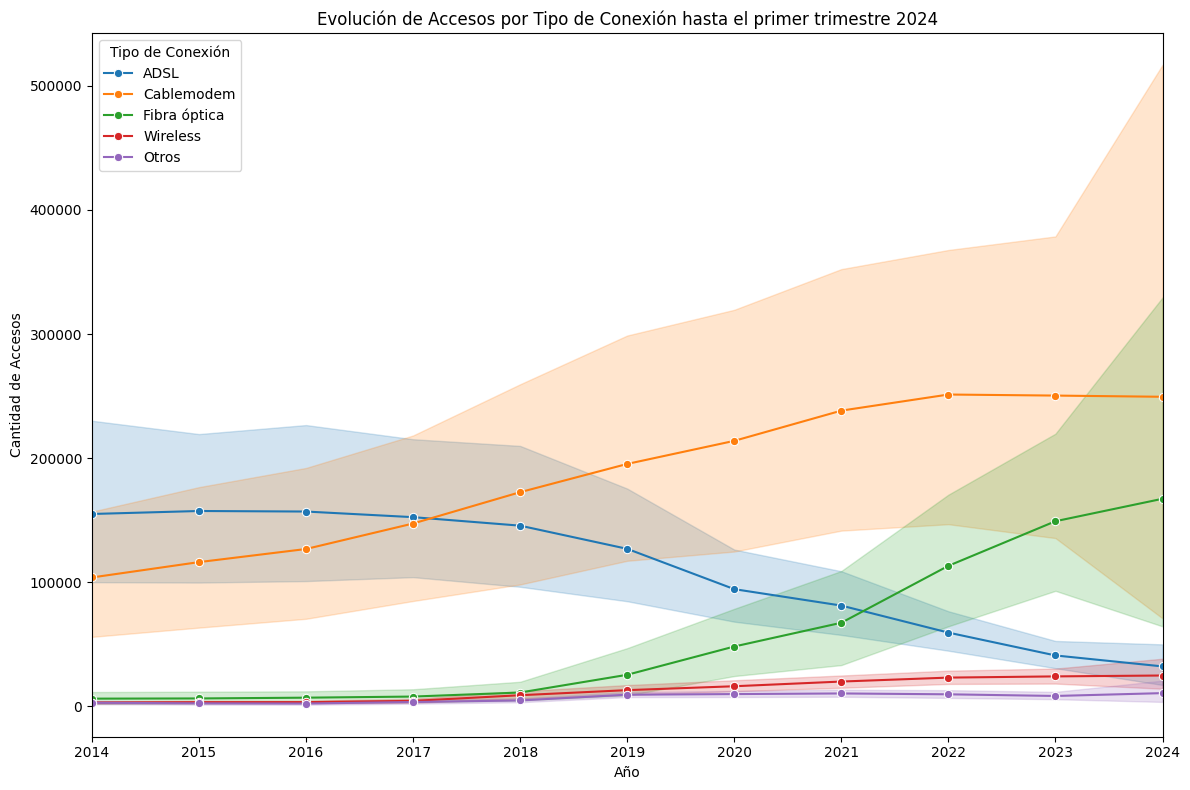

In [42]:
# Filtrar el DataFrame para mostrar solo hasta el año 2024
df7_filtrado = df7[df7['Año'] <= 2024]

# Crear una figura
plt.figure(figsize=(12, 8))

# Plotear las líneas para cada tipo de conexión
sns.lineplot(data=df7_filtrado, x='Año', y='ADSL', label='ADSL', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Cablemodem', label='Cablemodem', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Fibra óptica', label='Fibra óptica', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Wireless', label='Wireless', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Otros', label='Otros', marker='o')

# Configurar el rango del eje x para asegurarse de que se incluya 2023
plt.xlim(df7_filtrado['Año'].min(), 2024)

# Configurar las etiquetas del eje x para asegurarse de que 2023 esté presente
plt.xticks(range(df7_filtrado['Año'].min(), 2025))

# Configurar título, etiquetas y leyenda
plt.title('Evolución de Accesos por Tipo de Conexión hasta el primer trimestre 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.legend(title='Tipo de Conexión')

# Ajustar el layout para que no se superpongan elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Observaciones y Conclusiones del Análisis de Conexiones a Internet

#### Tipos de Conexión

1. **ADSL (Azul):** Se identifica una tendencia a la baja en el uso de ADSL a lo largo de los años. Esta disminución sugiere que ADSL está siendo progresivamente reemplazado por tecnologías más avanzadas, lo que refleja un cambio en las preferencias de los consumidores hacia opciones que ofrecen mayor velocidad y estabilidad.

2. **Cablemodem (Naranja):** Esta categoría muestra un crecimiento sostenido, aunque ha comenzado a estabilizarse en los últimos años. Esto indica que, si bien sigue siendo una opción popular, el ritmo de adopción está alcanzando un punto de meseta, posiblemente debido a la competencia de otras tecnologías.

3. **Fibra Óptica (Verde):** La fibra óptica presenta un crecimiento constante y significativo, especialmente en los años recientes. Este aumento sugiere una adopción creciente de esta tecnología, que se está consolidando como la opción preferida para aquellos que buscan conexiones más rápidas y fiables.

4. **Wireless (Rojo) y Otros (Morado):** Ambas categorías muestran una representación considerablemente menor en comparación con las tecnologías mencionadas anteriormente. Las variaciones en su uso a lo largo del tiempo son menos pronunciadas, lo que indica que su impacto en el mercado es limitado.

#### Tendencias Generales

a) **Crecimiento de la Fibra Óptica:** La fibra óptica es, sin duda, la tecnología con mayor crecimiento en el período analizado. Esto refleja una tendencia global hacia la adopción de conexiones más rápidas y estables, que son esenciales para soportar el creciente consumo de datos.

b) **Estabilización y Disminución de ADSL:** ADSL, que gozó de gran popularidad en años anteriores, está perdiendo cuota de mercado. Este fenómeno se debe a la migración de usuarios hacia tecnologías más modernas, como la fibra óptica y el cablemodem, que ofrecen mejores características de rendimiento.

c) **Cablemodem Estable:** Aunque el cablemodem continúa siendo una opción popular y su adopción ha sido constante, su crecimiento se ha moderado en los años recientes, lo que podría indicar una saturación en el mercado o un cambio en las preferencias hacia conexiones más rápidas.

d) **Wireless y Otros:** Las tecnologías inalámbricas y otras alternativas mantienen una participación marginal y estable en el mercado, sin mostrar cambios significativos en su adopción. Esto sugiere que, aunque útiles, no han alcanzado el nivel de penetración de las tecnologías principales.

#### Incertidumbre y Variabilidad

Las áreas sombreadas alrededor de cada línea en la gráfica indican una banda de incertidumbre o variabilidad. Esto puede reflejar fluctuaciones en los datos o la inclusión de múltiples puntos de datos agregados, lo que es importante considerar al interpretar las tendencias.

#### Consideraciones

Los datos analizados abarcan hasta el primer trimestre de 2024. Si bien esta información es útil para observar las tendencias más recientes, es importante tener en cuenta que el conjunto de datos para 2024 puede no ser completo o representativo del año en su totalidad.

### Conclusión

El análisis ofrece una visión clara de cómo ha cambiado la adopción de las diversas tecnologías de conexión a internet a lo largo de los años. La fibra óptica se encuentra en una clara expansión, mientras que el ADSL muestra un declive marcado. El cablemodem mantiene una presencia fuerte, aunque con un crecimiento más moderado. Por otro lado, las tecnologías wireless y otras alternativas permanecen con una participación marginal y estable en el mercado. Estos hallazgos sugieren que es fundamental para las políticas públicas y las estrategias empresariales enfocarse en la expansión de la infraestructura de fibra óptica, con el fin de promover la equidad en el acceso a internet de calidad en todas las regiones.

## Hoja Nro 10: 'Penetración-poblacion'
Penetración de internet en la población.

In [43]:
nombre_hoja = 'Penetración-poblacion'

#Cargar la hoja en un DataFrame
df10 = cargar_hoja_excel(ruta_archivo, nombre_hoja)
df10.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [44]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


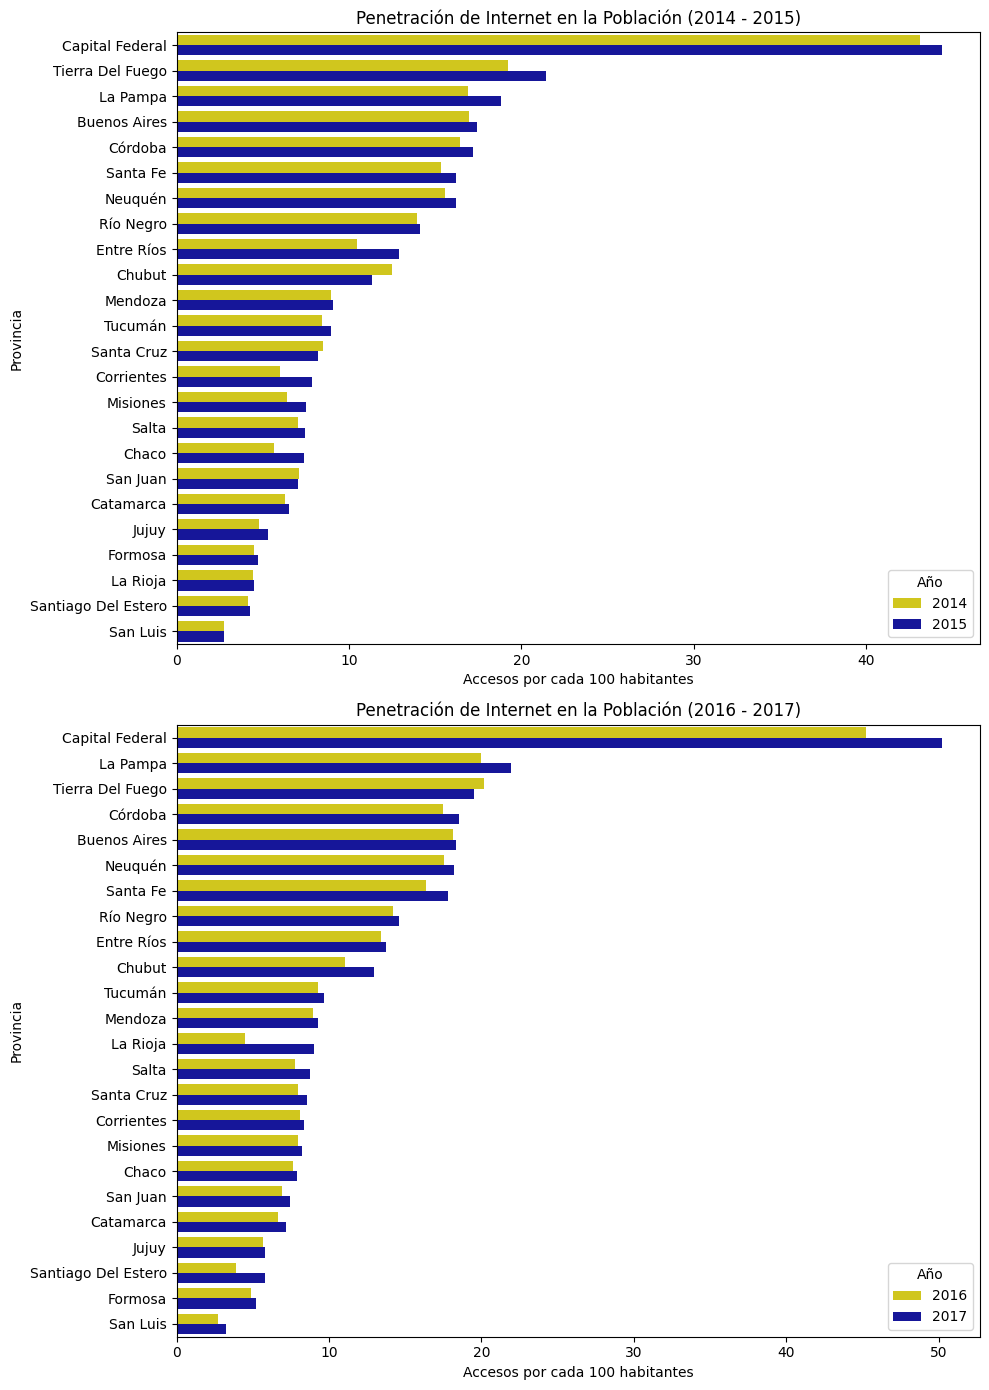

In [53]:
# Filtrar datos hasta el 2023
df10_filtrado = df10[df10['Año'] <= 2023]

# Agrupar por año y provincia para obtener la media de accesos por cada 100 habitantes
df10_agrupado = df10_filtrado.groupby(['Año', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear una figura con dos paneles
fig, axes = plt.subplots(2, 1, figsize=(10, 14))

# Obtener los años únicos para crear los gráficos por año
years = sorted(df10_agrupado['Año'].unique())

# Definir una paleta de colores personalizada o usar una paleta predefinida de seaborn
paleta_personalizada = ["#EEE000", "#0000AF"]  # Ejemplo de paleta personalizada

# Graficar cada año en un panel diferente
for i, ax in enumerate(axes):
    year_data = df10_agrupado[df10_agrupado['Año'].isin(years[i*2:i*2+2])]

    # Ordenar los datos por accesos por cada 100 habitantes
    year_data_sorted = year_data.sort_values('Accesos por cada 100 hab', ascending=False)

    # Crear gráfico de barras
    sns.barplot(
        data=year_data_sorted,
        x='Accesos por cada 100 hab',
        y='Provincia',
        hue='Año',
        ax=ax,
        palette=paleta_personalizada
    )

    # Configurar el título de cada panel
    ax.set_title(f'Penetración de Internet en la Población ({years[i*2]} - {years[i*2+1]})')
    ax.set_xlabel('Accesos por cada 100 habitantes')
    ax.set_ylabel('Provincia')

    # Ajustar la leyenda
    ax.legend(title='Año')

# Ajustar el layout para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

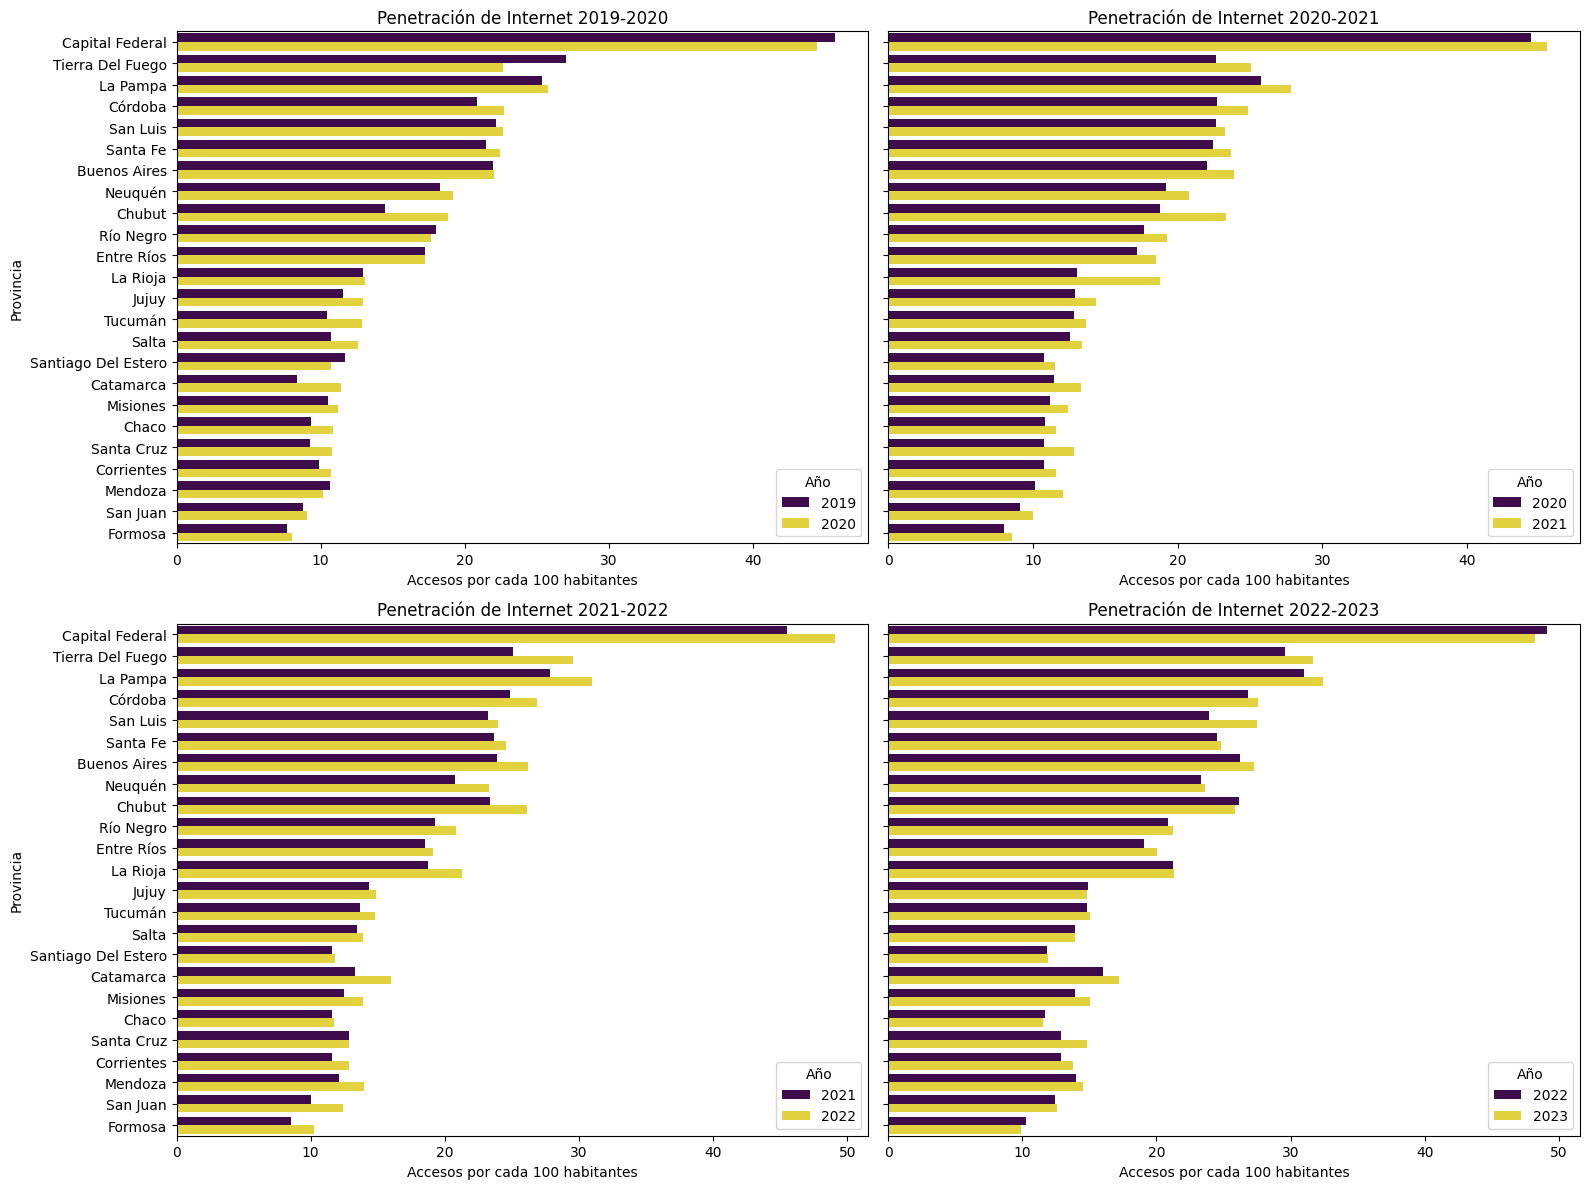

In [54]:
# Filtrar datos desde 2019 hasta 2023
df10_filtrado = df10[(df10['Año'] >= 2019) & (df10['Año'] <= 2023)]

# Agrupar por año y provincia para obtener la media de accesos por cada 100 habitantes
df10_agrupado = df10_filtrado.groupby(['Año', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear una figura con dos paneles
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)  # 2 filas, 2 columnas

# Definir los rangos de años para cada panel
year_ranges = [(2019, 2020), (2020, 2021), (2021, 2022), (2022, 2023)]

# Graficar cada rango de años en su panel correspondiente
for i, (start_year, end_year) in enumerate(year_ranges):
    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Filtrar datos para el rango de años actual
    year_data = df10_agrupado[(df10_agrupado['Año'] >= start_year) & (df10_agrupado['Año'] <= end_year)]

    # Ordenar los datos por accesos por cada 100 habitantes
    year_data_sorted = year_data.sort_values('Accesos por cada 100 hab', ascending=False)

    # Crear gráfico de barras
    sns.barplot(
        data=year_data_sorted,
        x='Accesos por cada 100 hab',
        y='Provincia',
        hue='Año',
        ax=ax,
        palette='viridis'  # Usar una paleta de colores llamativa
    )

    # Configurar el título de cada panel
    ax.set_title(f'Penetración de Internet {start_year}-{end_year}')
    ax.set_xlabel('Accesos por cada 100 habitantes')
    ax.set_ylabel('Provincia')

    # Ajustar la leyenda
    ax.legend(title='Año')

# Ajustar el layout para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

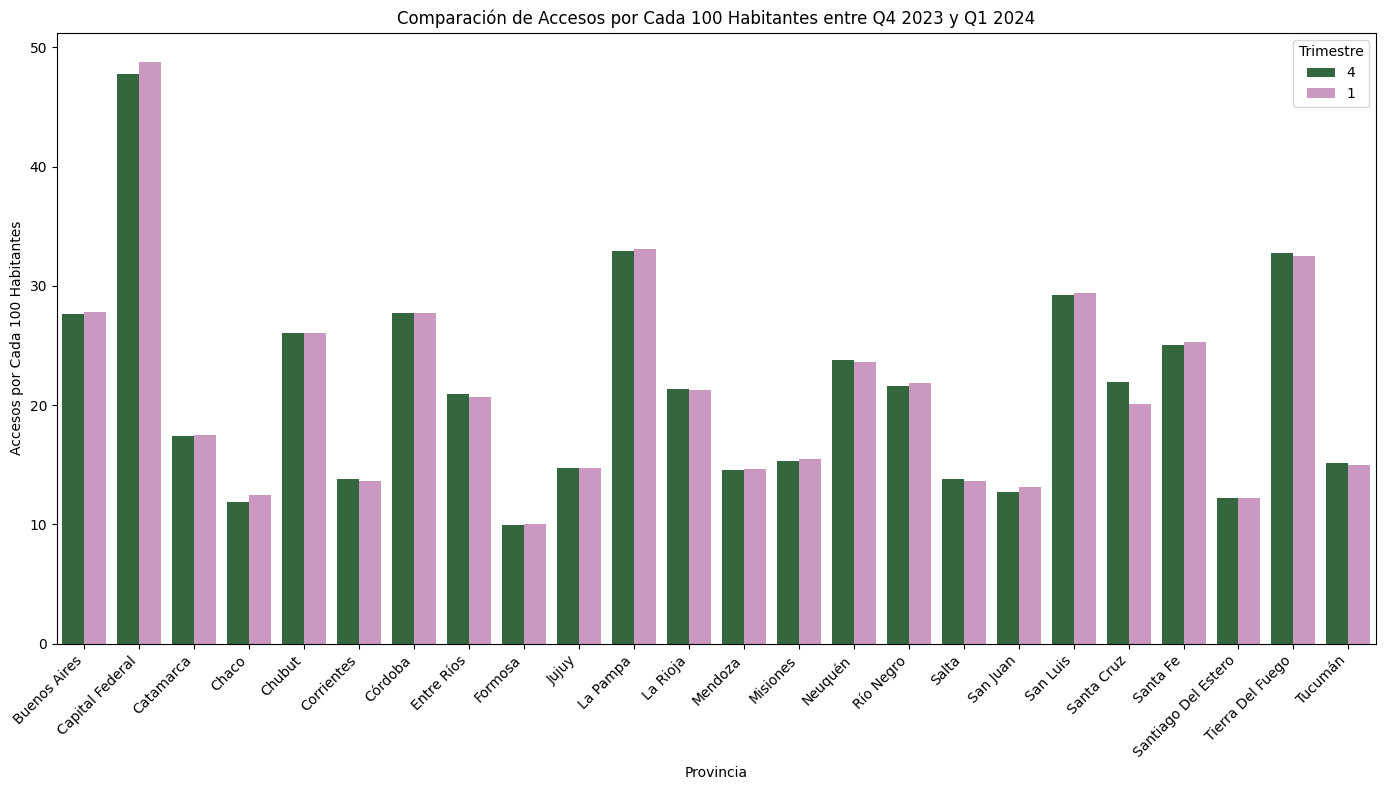

In [56]:

# Filtrar solo los trimestres de interés: Q4 2023 y Q1 2024
df_filtrado = df10[((df10['Año'] == 2023) & (df10['Trimestre'] == 4)) | ((df10['Año'] == 2024) & (df10['Trimestre'] == 1))]

# Agrupar por año, trimestre y provincia para obtener la media de accesos por cada 100 habitantes
df_agrupado = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Ordenar los datos para asegurar que las barras aparezcan en el orden deseado
df_agrupado['Trimestre'] = pd.Categorical(df_agrupado['Trimestre'], categories=[4, 1], ordered=True)
df_agrupado.sort_values(['Provincia', 'Año', 'Trimestre'], inplace=True)

# Crear gráfico de barras para comparar los dos trimestres
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=df_agrupado, x='Provincia', y='Accesos por cada 100 hab', hue='Trimestre', palette='cubehelix', hue_order=[4, 1])

# Configurar título y etiquetas
plt.title('Comparación de Accesos por Cada 100 Habitantes entre Q4 2023 y Q1 2024')
plt.xlabel('Provincia')
plt.ylabel('Accesos por Cada 100 Habitantes')

# Ajustar las etiquetas del eje X
ticks = barplot.get_xticks()
labels = [item.get_text() for item in barplot.get_xticklabels()]
barplot.set_xticks(ticks)
barplot.set_xticklabels(labels, rotation=45, ha='right')

# Mostrar leyenda
plt.legend(title='Trimestre', loc='upper right')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3652\4020163430.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_agrupado, x='Trimestre_Año', y='Accesos por cada 100 hab', marker='o', sort=False, palette='viridis')


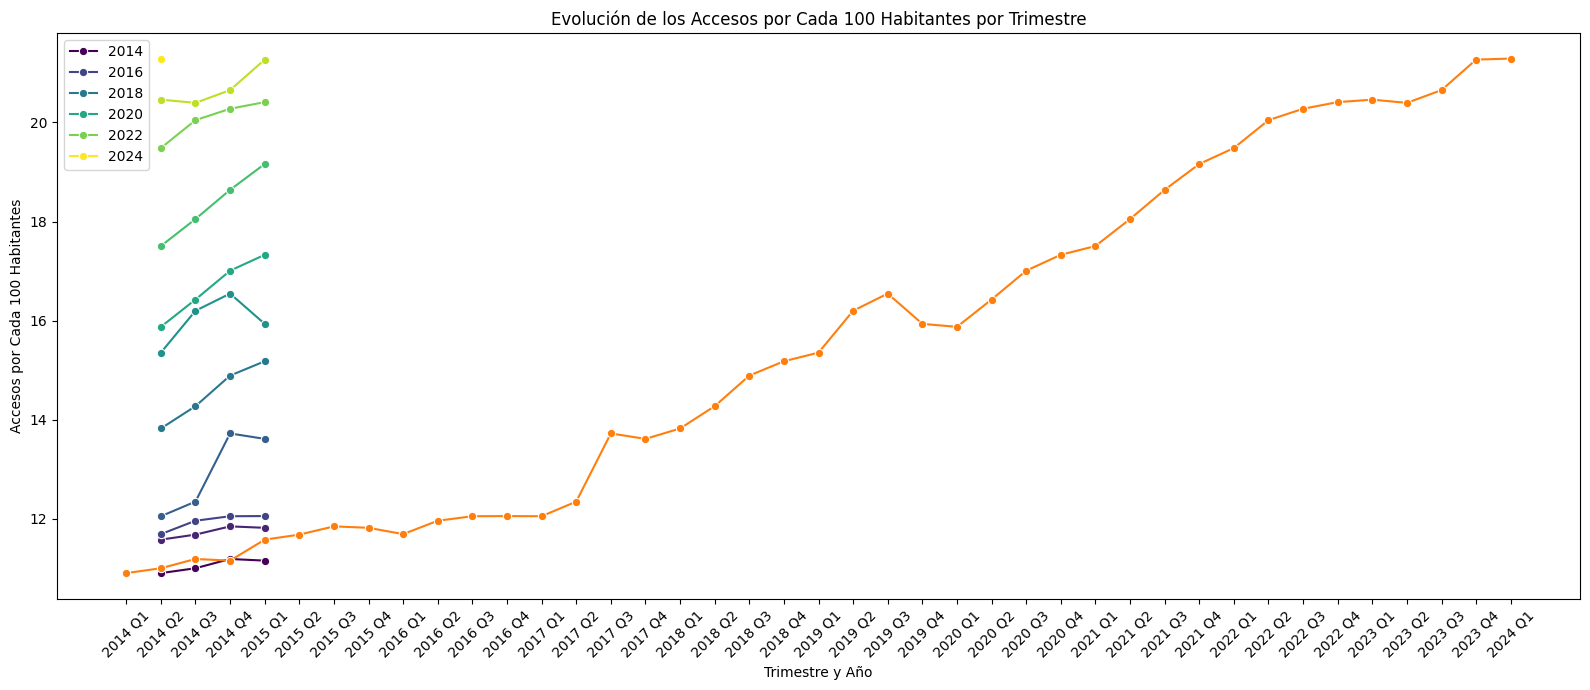

In [59]:

# Agrupar por año y trimestre para obtener la media de accesos por cada 100 habitantes
df_agrupado = df10.groupby(['Año', 'Trimestre'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear un lineplot para mostrar la evolución de los accesos por cada 100 habitantes
plt.figure(figsize=(16, 7))
lineplot = sns.lineplot(data=df_agrupado, x='Trimestre', y='Accesos por cada 100 hab', hue='Año', marker='o', palette='viridis')

# Crear una columna 'Trimestre_Año' para tener una etiqueta unificada de cada punto en el eje x
df_agrupado['Trimestre_Año'] = df_agrupado['Año'].astype(str) + ' Q' + df_agrupado['Trimestre'].astype(str)

# Dibujar la línea
sns.lineplot(data=df_agrupado, x='Trimestre_Año', y='Accesos por cada 100 hab', marker='o', sort=False, palette='viridis')

# Configurar las etiquetas y títulos del gráfico
plt.title('Evolución de los Accesos por Cada 100 Habitantes por Trimestre')
plt.xlabel('Trimestre y Año')
plt.ylabel('Accesos por Cada 100 Habitantes')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visualización

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Observaciones

Los gráficos ofrecen una perspectiva detallada sobre la evolución de la penetración de internet en Argentina, analizada por provincias y a lo largo de los años.

* **Incremento Generalizado:** Desde 2019 hasta 2023, se ha observado un aumento notable en la penetración de internet en todas las provincias, lo que refleja un avance significativo en el acceso a la conectividad.

* **Liderazgo de Capital Federal y Tierra del Fuego:** Estas dos jurisdicciones destacan consistentemente en términos de accesos por cada 100 habitantes, alcanzando los valores más altos de penetración. Esto indica un desarrollo de infraestructura de telecomunicaciones robusto y una mayor demanda de servicios digitales en estas regiones.

### Mejoras Notables en Provincias Rezagadas

* Provincias como La Pampa y Río Negro han mostrado avances significativos en su penetración de internet, acercándose a los niveles de las provincias líderes. Esto sugiere un esfuerzo conjunto por parte de los gobiernos locales y proveedores de servicios para mejorar la infraestructura.

* En contraste, otras provincias, como Formosa y San Juan, aún presentan niveles más bajos de penetración. Sin embargo, es importante destacar que también han experimentado incrementos, lo que denota un progreso gradual en su acceso a internet.

* **Crecimiento Continuo:** Se observa un crecimiento sostenido en los accesos por cada 100 habitantes desde 2014 hasta el primer trimestre de 2024. A partir de 2019, se evidencia una aceleración en este crecimiento, lo que indica una tendencia positiva hacia la adopción de servicios de internet en todo el país.

* **Patrones Estacionales:** Los datos revelan patrones estacionales en los que se registran incrementos más pronunciados en ciertos trimestres. Este fenómeno puede estar relacionado con factores como promociones comerciales, campañas de concientización y la introducción de nuevos servicios que incentivan el uso de internet.

En resumen, el análisis muestra un panorama optimista respecto al avance de la conectividad en Argentina, destacando tanto las mejoras en provincias rezagadas como el liderazgo continuo de las jurisdicciones con mayor penetración. La tendencia de crecimiento sostenido y los patrones estacionales también ofrecen información valiosa para la planificación y desarrollo de futuras estrategias en telecomunicaciones.

## Hoja Nro 11: 'Penetracion-hogares'
Penetración de internet en hogares.


In [61]:
nombre_hoja = 'Penetracion-hogares'

#Cargar la hoja en un DataFrame
df11 = cargar_hoja_excel(ruta_archivo, nombre_hoja)
df11.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [62]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


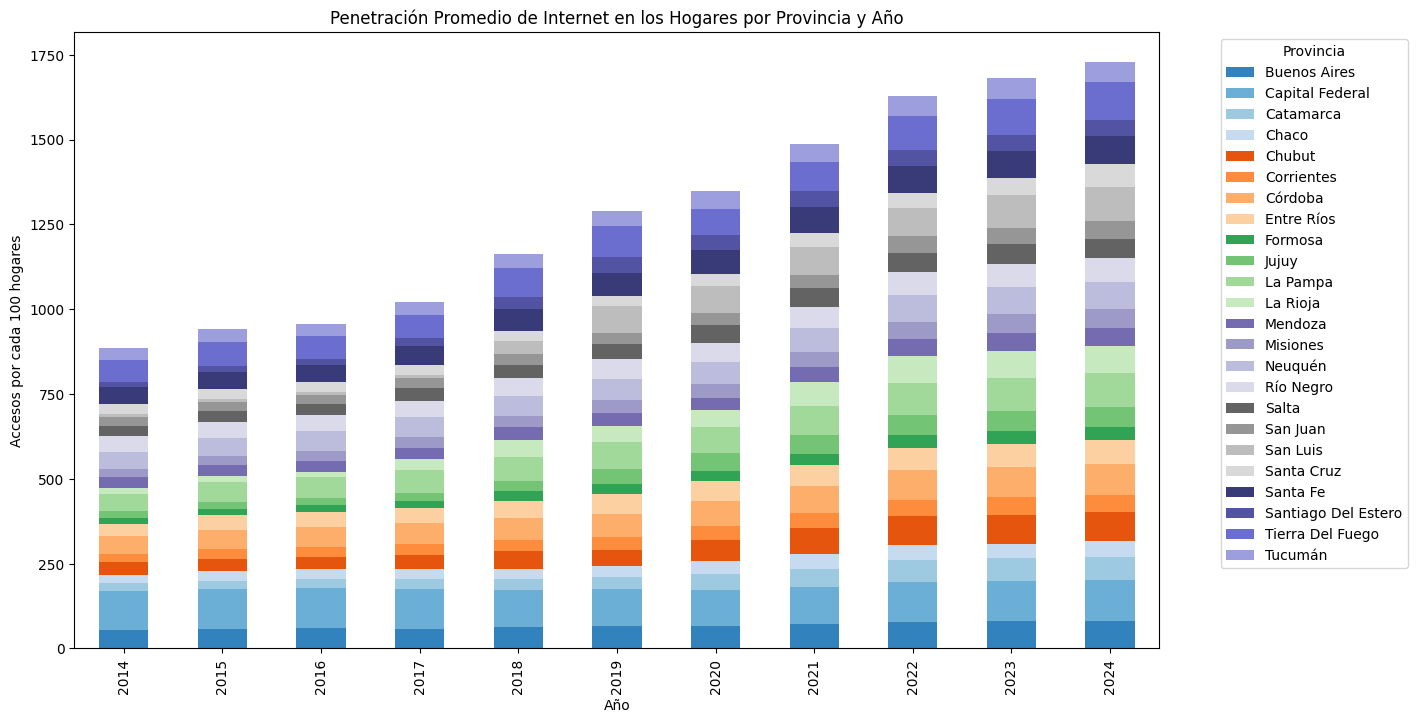

In [63]:

df_agrupado = df11.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de barras apiladas usando la paleta definida
ax = df_agrupado.plot(kind='bar', stacked=True, figsize=(14, 8), color=full_palette)

# Configurar título y etiquetas
plt.title('Penetración Promedio de Internet en los Hogares por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

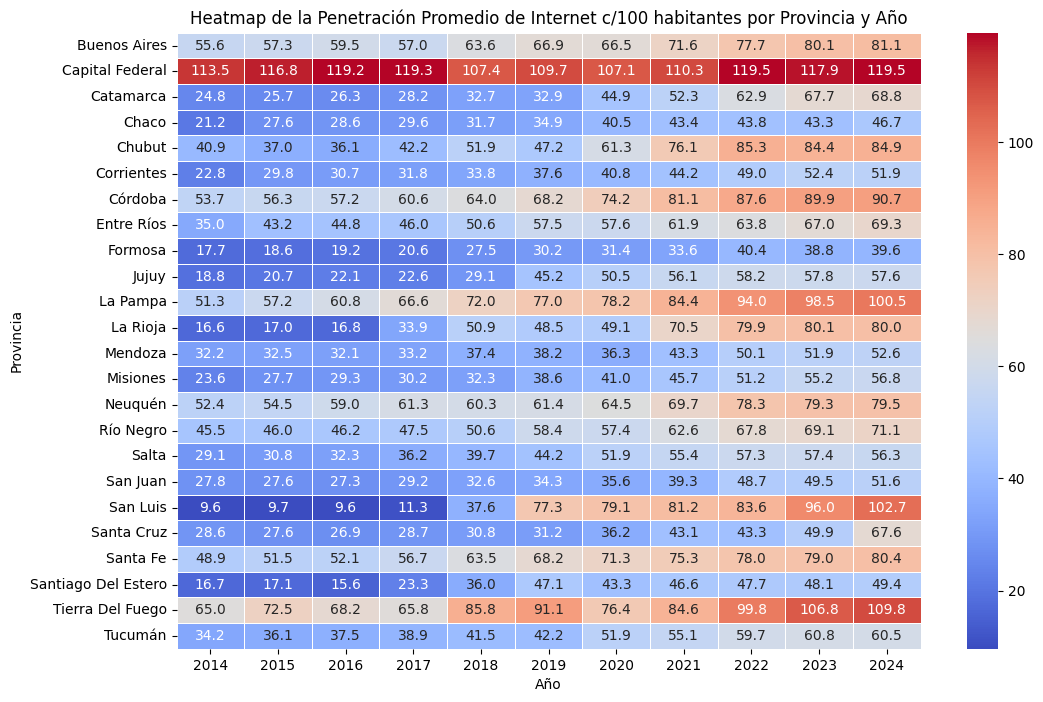

In [64]:
# Crear un heatmap de la penetración de internet
heatmap_data = df11.pivot_table(index='Provincia', columns='Año', values='Accesos por cada 100 hogares', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Heatmap de la Penetración Promedio de Internet c/100 habitantes por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Provincia')
plt.show()

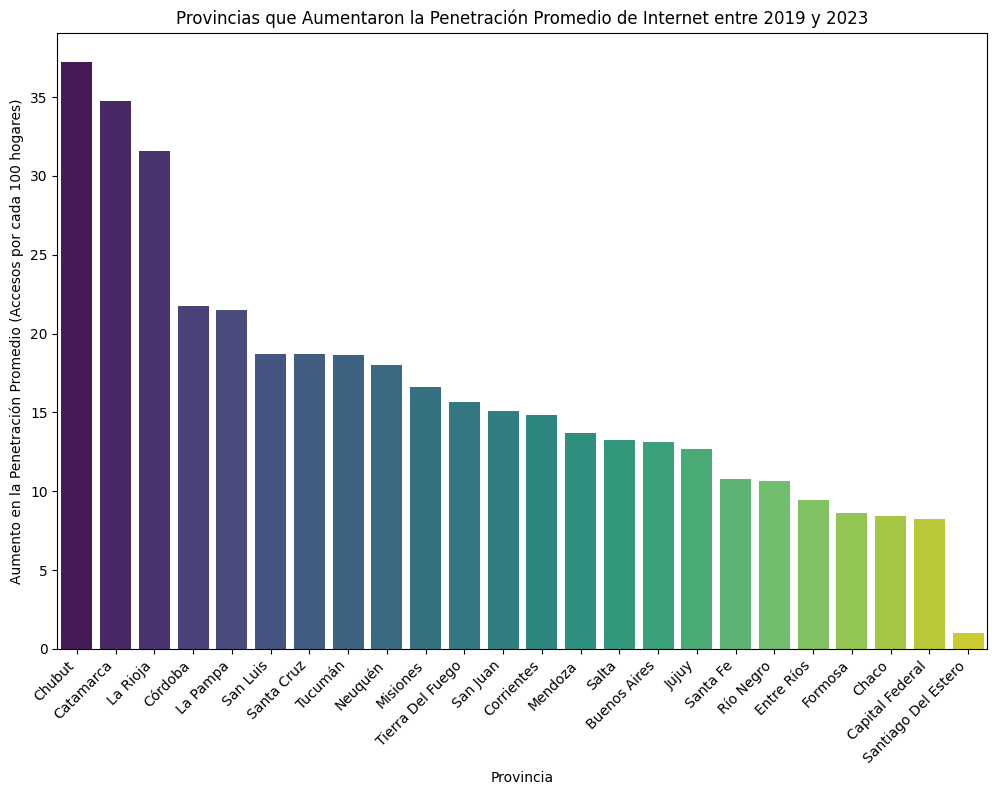

In [65]:
# Filtrar datos para los años 2019 y 2023
df_filtrado = df11[(df11['Año'] == 2019) | (df11['Año'] == 2023)]

# Agrupar por año y provincia para obtener la media de accesos por cada 100 hogares
df_agrupado = df_filtrado.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean().unstack()

# Calcular la diferencia en la penetración de internet entre 2023 y 2019
diferencia = df_agrupado.loc[2023] - df_agrupado.loc[2019]

# Filtrar para mantener solo las provincias con un aumento en la penetración
aumento = diferencia[diferencia > 0].sort_values(ascending=False)

# Crear un gráfico de barras para mostrar las provincias con aumento
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=aumento.index, y=aumento.values, palette='viridis')
plt.title('Provincias que Aumentaron la Penetración Promedio de Internet entre 2019 y 2023')
plt.xlabel('Provincia')
plt.ylabel('Aumento en la Penetración Promedio (Accesos por cada 100 hogares)')

# Ajustar las etiquetas del eje X correctamente
ticks = range(len(aumento.index))  # Crear una lista de posiciones de ticks para cada provincia
barplot.set_xticks(ticks)  # Fijar los localizadores a estas posiciones
barplot.set_xticklabels(aumento.index, rotation=45, horizontalalignment='right')  # Establecer las etiquetas

# Mostrar el gráfico
plt.show()

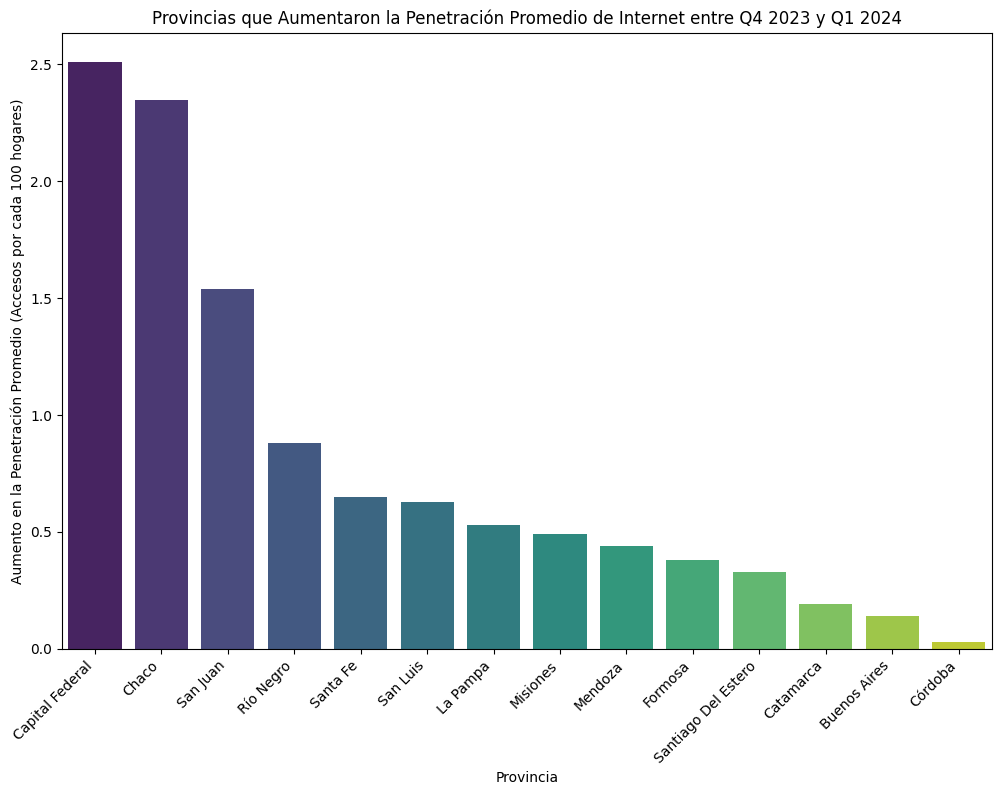

In [66]:
# Filtrar datos para los trimestres Q4 2023 y Q1 2024
df_filtrado = df11[((df11['Año'] == 2023) & (df11['Trimestre'] == 4)) | ((df11['Año'] == 2024) & (df11['Trimestre'] == 1))]

# Agrupar por año, trimestre y provincia para obtener la media de accesos por cada 100 hogares
df_agrupado = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Accesos por cada 100 hogares'].mean().reset_index()

# Convertir el DataFrame agrupado en un pivote para facilitar la comparación
df_pivote = df_agrupado.pivot_table(index='Provincia', columns=['Año', 'Trimestre'], values='Accesos por cada 100 hogares')

# Calcular la diferencia en la penetración de internet entre Q1 2024 y Q4 2023
diferencia = df_pivote[(2024, 1)] - df_pivote[(2023, 4)]

# Filtrar para mantener solo las provincias con un aumento en la penetración
aumento = diferencia[diferencia > 0].sort_values(ascending=False)

# Verificar si hay datos para mostrar
if aumento.empty:
    print("No hay provincias que mostraron un aumento de penetración de Internet entre Q4 2023 y Q1 2024.")
else:
    # Crear un gráfico de barras para mostrar las provincias con aumento
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x=aumento.index, y=aumento.values, palette='viridis')
    plt.title('Provincias que Aumentaron la Penetración Promedio de Internet entre Q4 2023 y Q1 2024')
    plt.xlabel('Provincia')
    plt.ylabel('Aumento en la Penetración Promedio (Accesos por cada 100 hogares)')

    # Ajustar las etiquetas del eje X correctamente
    ticks = range(len(aumento.index))  # Crear una lista de posiciones de ticks para cada provincia
    barplot.set_xticks(ticks)  # Fijar los localizadores a estas posiciones
    barplot.set_xticklabels(aumento.index, rotation=45, horizontalalignment='right')  # Establecer las etiquetas

    # Mostrar el gráfico
    plt.show()

### **Observaciones y Conclusiones** (Redactado profesionalmente)

**Crecimiento Sostenido:**
Desde 2014 hasta 2024, la penetración de internet en los hogares argentinos ha mostrado un crecimiento sostenido. Este incremento es particularmente marcado a partir de 2020, reflejando un aumento en la conectividad y la adopción de servicios digitales en el país.

**Desigualdad Regional:**
Aunque todas las provincias han evidenciado mejoras en la penetración de internet, se observa una disparidad significativa entre ellas. Las provincias más desarrolladas, como Buenos Aires y Capital Federal, muestran los niveles más altos de penetración, mientras que regiones como Catamarca y La Rioja, si bien han registrado avances, aún exhiben un ritmo de crecimiento más moderado.

**Liderazgo de Capital Federal y Buenos Aires:**
Capital Federal y Buenos Aires se consolidan como las áreas con mayor penetración de internet, consistentemente superando los valores promedio nacionales. Capital Federal, en particular, destaca con más de 100 accesos por cada 100 hogares, lo que refleja una saturación del mercado y una alta adopción tecnológica.

**Mejoras en Provincias con Baja Penetración:**
Regiones como La Rioja, Formosa y Misiones han experimentado un crecimiento significativo, acercándose al promedio nacional, lo que es un indicador positivo de la reducción de brechas digitales. Además, provincias como La Pampa y Tierra del Fuego también destacan por su acelerado crecimiento en los últimos años.

**Disparidades Persistentes:**
A pesar de los avances, persisten disparidades entre las provincias. Las regiones con menor penetración al inicio del período, aunque han mostrado mejoras, aún requieren atención y una estrategia de inversión más focalizada para alcanzar los niveles de conectividad observados en las provincias líderes.

### **Conclusiones:**
El desarrollo de la infraestructura de internet en Argentina ha sido notable en los últimos años, con un crecimiento sostenido y mejoras en la conectividad. Sin embargo, es fundamental continuar fortaleciendo la inversión en aquellas regiones más rezagadas, asegurando que el acceso a internet sea equitativo en todo el territorio nacional. Una estrategia que aborde las disparidades regionales será crucial para garantizar la inclusión digital de todas las provincias y fomentar un desarrollo tecnológico integral en el país.

# **Calcular KPI 1**
Aumentar el 2% los accesos a internet para provincias con baja penetración

In [68]:
# Calcular la mediana de "Accesos por cada 100 hogares"
mediana_accesos = df11['Accesos por cada 100 hogares'].median()

# Identificar las provincias con baja penetración (por debajo de la mediana)
provincias_baja_penetracion = df11[df11['Accesos por cada 100 hogares'] < mediana_accesos]['Provincia']

# Crear una copia del DataFrame original para el nuevo DataFrame de resultados
df_kpi = df11.copy()

# Calcular el nuevo valor de acceso con el aumento del 2% para provincias con baja penetración
df_kpi['Nuevo_acceso'] = df_kpi.apply(
    lambda row: row['Accesos por cada 100 hogares'] * 1.02 if row['Provincia'] in provincias_baja_penetracion.values else row['Accesos por cada 100 hogares'],
    axis=1
)

# Calcular el KPI
df_kpi['KPI_Aumento_Acceso'] = ((df_kpi['Nuevo_acceso'] - df_kpi['Accesos por cada 100 hogares']) / df_kpi['Accesos por cada 100 hogares']) * 100

# Crear un nuevo DataFrame solo con las columnas relevantes
df_kpi_resultado = df_kpi[['Provincia', 'Accesos por cada 100 hogares', 'Nuevo_acceso', 'KPI_Aumento_Acceso']]

In [69]:
df_kpi_resultado.head()

,Provincia,Accesos por cada 100 hogares,Nuevo_acceso,KPI_Aumento_Acceso
0,Buenos Aires,81.10,81.1000,0.0
1,Capital Federal,119.53,119.5300,0.0
2,Catamarca,68.82,70.1964,2.0
3,Chaco,46.70,47.6340,2.0
4,Chubut,84.89,86.5878,2.0


## Hoja Nro 14: 'Accesos por velocidad'
Accesos a internet desglosados por velocidad de conexión.

In [72]:
nombre_hoja = 'Accesos por velocidad'

#Cargar la hoja en un DataFrame
df14 = cargar_hoja_excel(ruta_archivo, nombre_hoja)
df14.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


In [73]:
# Mostrar los valores únicos en la columna 'Provincia'
print(df14['Provincia'].unique())

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [74]:
#Obtener información del tipo de dato de cada variable
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


In [75]:
# Verificar duplicados
duplicados = df14.duplicated()

# Mostrar si hay duplicados
if duplicados.any():
    print("Hay filas duplicadas en el DataFrame.")
    print(df14[duplicados])
else:
    print("No hay filas duplicadas en el DataFrame.")

No hay filas duplicadas en el DataFrame.


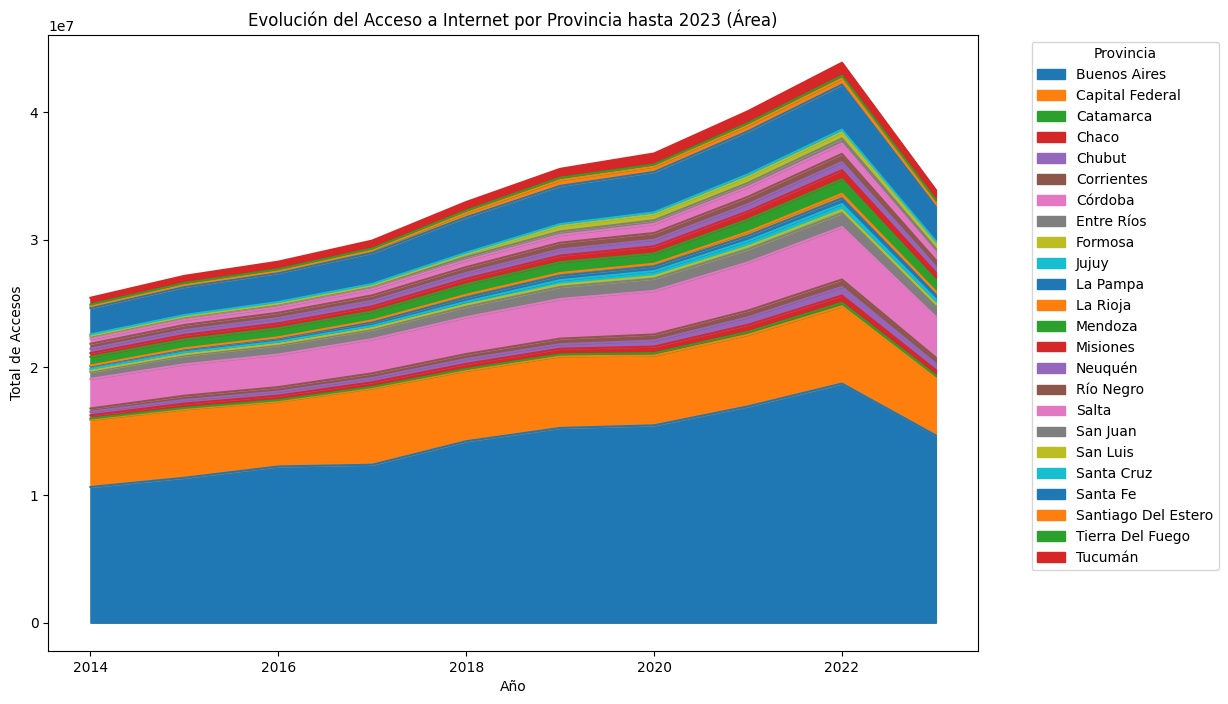

In [76]:
# Filtrar los datos para incluir solo hasta el año 2023
df_filtrado = df14[df14['Año'] <= 2023]

# Agrupar los datos filtrados por año y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Evolución del Acceso a Internet por Provincia hasta 2023 (Área)')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Se observa una bajada en el total de accesos para todas las provincias, por ello se estudiará en particular el comportamiento de los datos a partir del 2022 y por trimestres

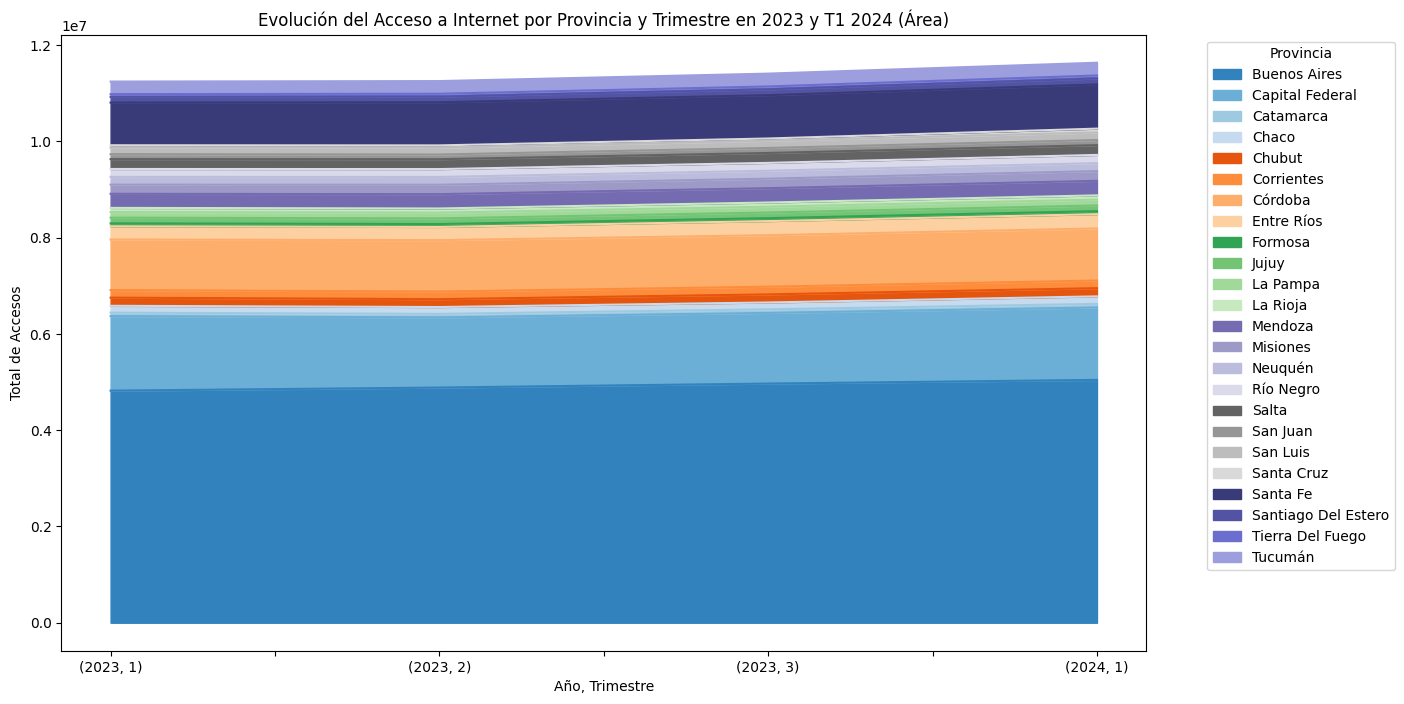

In [77]:
# Filtrar los datos para incluir solo desde el primer trimestre de 2023 hasta el primer trimestre de 2024
df_filtrado = df14[(df14['Año'] == 2023) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1))]

# Agrupar los datos filtrados por año, trimestre y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(14, 8), color=full_palette)
plt.title('Evolución del Acceso a Internet por Provincia y Trimestre en 2023 y T1 2024 (Área)')
plt.xlabel('Año, Trimestre')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


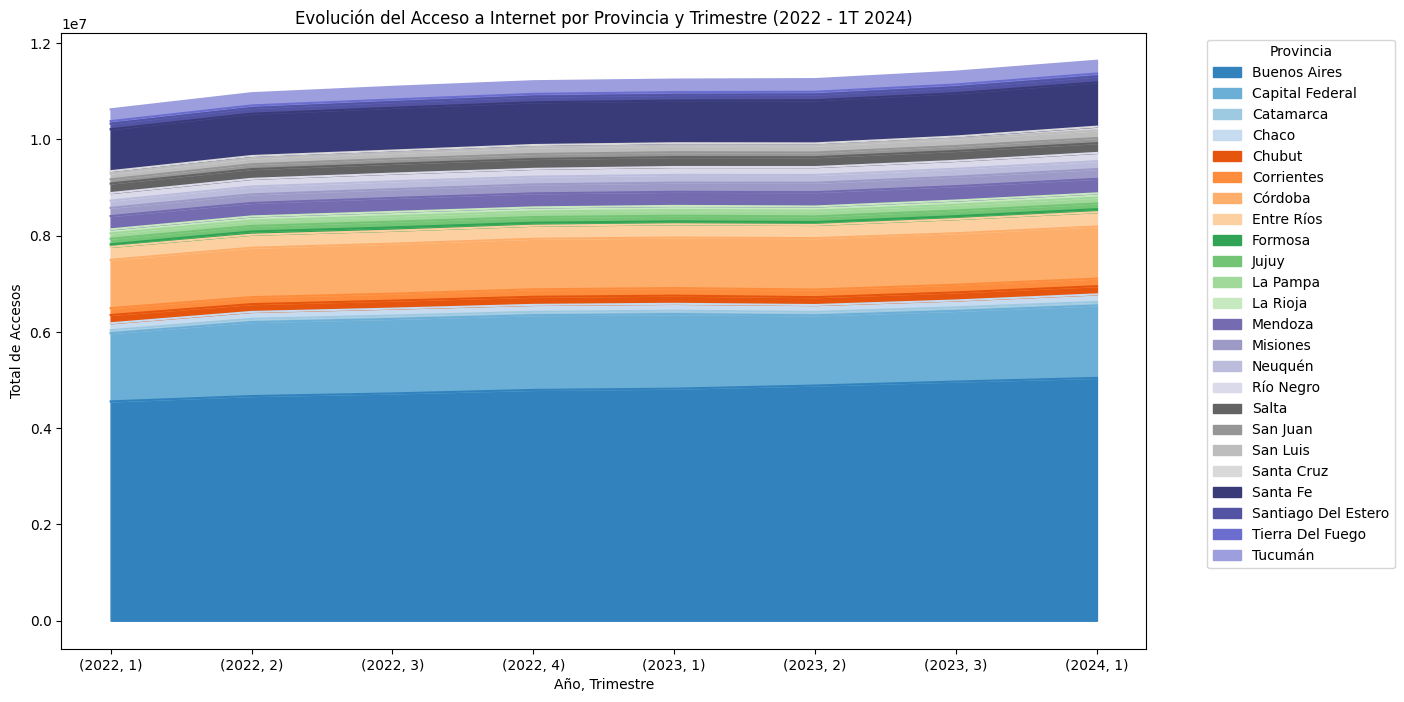

In [78]:
# Filtrar los datos para incluir solo los años 2022, 2023 y el primer trimestre de 2024
df_filtrado = df14[((df14['Año'] == 2022) | (df14['Año'] == 2023) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1)))]

# Agrupar los datos filtrados por año, trimestre y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(14, 8), color=full_palette)
plt.title('Evolución del Acceso a Internet por Provincia y Trimestre (2022 - 1T 2024)')
plt.xlabel('Año, Trimestre')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

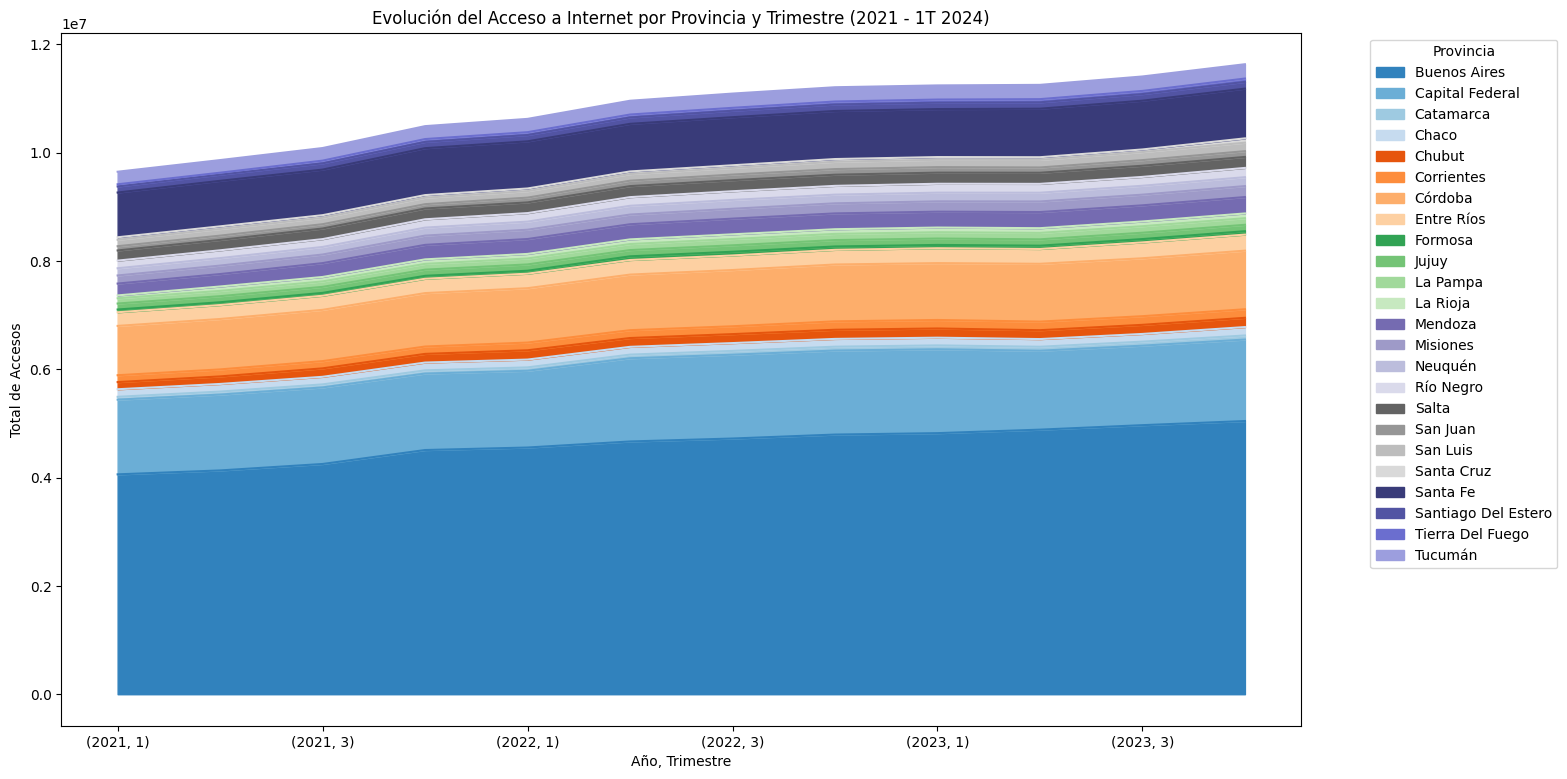

In [79]:
# Filtrar los datos para incluir desde el año 2021 hasta el primer trimestre de 2024
df_filtrado = df14[((df14['Año'] >= 2021) & (df14['Año'] < 2024)) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1))]

# Agrupar los datos filtrados por año, trimestre y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(16, 9), color=full_palette)
plt.title('Evolución del Acceso a Internet por Provincia y Trimestre (2021 - 1T 2024)')
plt.xlabel('Año, Trimestre')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

En el recuento de Totales por trimestre, los datos muestran una suba gradual. Es decir que es recomedable hacer comparaciones por trimestre.

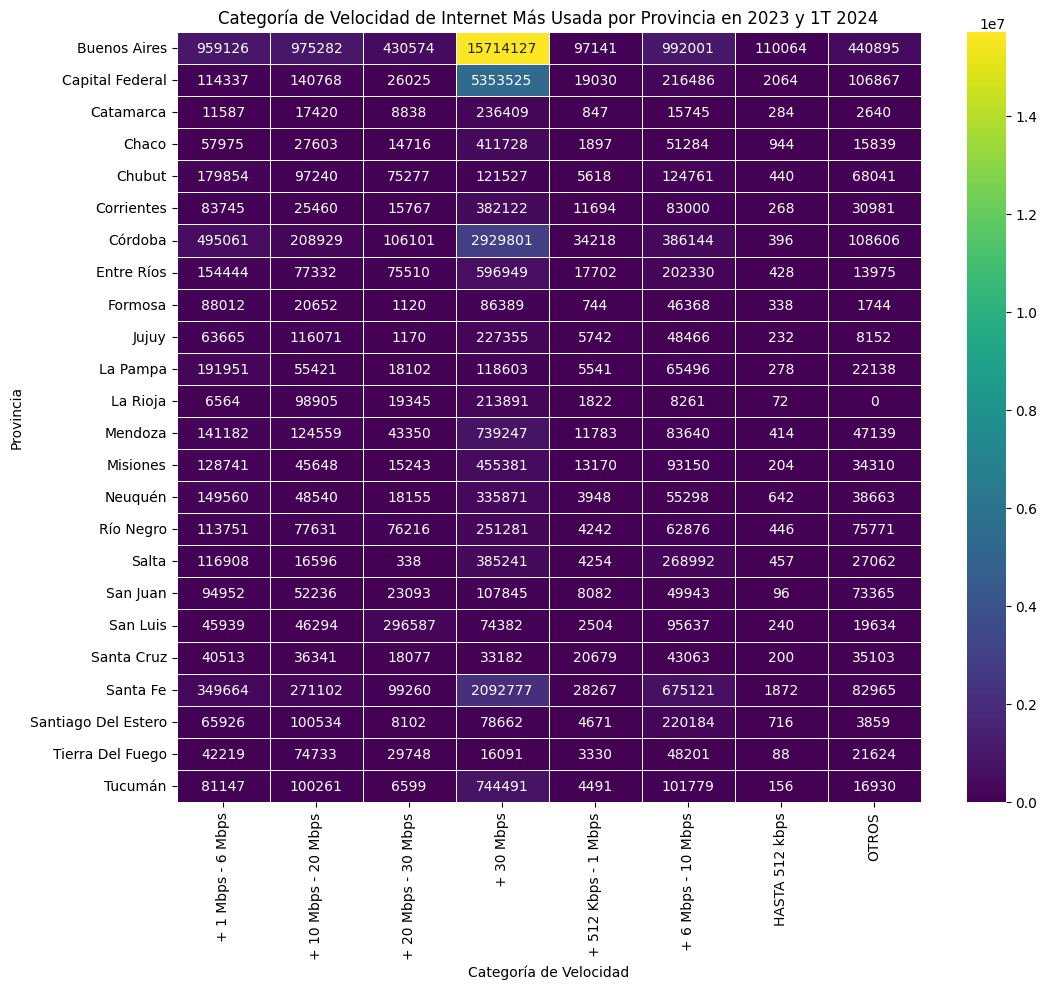

In [80]:
# Filtrar los datos para incluir solo los trimestres deseados del 2023 y el primer trimestre de 2024
df_filtrado = df14[((df14['Año'] == 2023) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1)))]

# Lista de categorías de velocidad correctas según los nombres de las columnas
categories = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
    '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS'
]

# Preparar los datos, sumar los accesos por categoría y provincia
df_filtrado = df_filtrado.melt(id_vars=['Año', 'Trimestre', 'Provincia'], value_vars=categories,
                               var_name='Categoría', value_name='Accesos')

# Agrupar los datos por provincia y categoría para obtener la suma total de accesos
df_agrupado = df_filtrado.groupby(['Provincia', 'Categoría'])['Accesos'].sum().reset_index()

# Crear un pivot table para el heatmap correctamente
pivot_table = df_agrupado.pivot(index='Provincia', columns='Categoría', values='Accesos')

# Crear un heatmap para visualizar los datos
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=.5, cmap='viridis')
plt.title('Categoría de Velocidad de Internet Más Usada por Provincia en 2023 y 1T 2024')
plt.xlabel('Categoría de Velocidad')
plt.ylabel('Provincia')
plt.show()

### **Observaciones Clave del Heatmap**

**Provincias con Altos Niveles de Accesos:**
El análisis revela que Buenos Aires y Capital Federal destacan considerablemente en la categoría de velocidades superiores a 30 Mbps. Buenos Aires, con 15,714,127 accesos en esta categoría, lidera de manera indiscutible frente a otras provincias y categorías. Asimismo, Capital Federal sigue esta tendencia con 5,353,525 accesos en la misma franja de velocidad, confirmando el liderazgo de estas dos regiones en términos de conectividad de alta velocidad.

**Distribución por Categoría:**
El patrón de distribución de accesos según la velocidad varía considerablemente entre provincias. Mientras que la mayoría de las provincias, particularmente las más urbanizadas, concentran sus mayores valores en velocidades superiores a 30 Mbps, provincias más rezagadas como Catamarca y La Rioja muestran una predominancia de accesos en las categorías de velocidad media, específicamente en los rangos de +1 Mbps a 6 Mbps y de 6 Mbps a 10 Mbps. Esto subraya la disparidad en la evolución tecnológica y la capacidad de infraestructura entre regiones.

**Comparación entre Provincias:**
Al comparar las provincias, se observa que Formosa, Jujuy y La Rioja presentan el menor número de accesos en todas las categorías de velocidad, lo que refleja un retraso en la adopción de tecnologías más avanzadas. En contraste, provincias como Córdoba y Mendoza presentan una distribución más equilibrada de accesos en varias categorías de velocidad, lo que sugiere un ecosistema de conectividad más diversificado y un mejor acceso a diversas opciones de ancho de banda.

**Tendencia hacia Mayores Velocidades:**
El análisis del heatmap también pone en evidencia una clara tendencia hacia la adopción de mayores velocidades de internet en todo el país, particularmente en las provincias más grandes y urbanizadas. Buenos Aires y Capital Federal, al igual que otras zonas urbanas, están empujando la demanda de velocidades superiores a 30 Mbps, lo que responde al crecimiento de servicios digitales, la mayor demanda de conectividad por parte de los hogares y la expansión de actividades económicas basadas en la digitalización.

**Desigualdad Regional:**
Pese a la tendencia global hacia mayores velocidades de conexión, persiste una marcada desigualdad en la penetración de internet de alta velocidad entre las provincias. Algunas regiones muestran una alta concentración de accesos en categorías de velocidad baja y media, lo que refleja un desarrollo más lento de la infraestructura de telecomunicaciones. Esto pone de relieve la necesidad de enfoques diferenciados para mejorar el acceso a internet de alta velocidad en las zonas más rezagadas.

### **Recomendaciones:**

**Políticas de Infraestructura:**
Para reducir la brecha de conectividad entre provincias, es fundamental implementar políticas públicas y programas específicos orientados a mejorar la infraestructura de telecomunicaciones en las regiones con menores accesos a altas velocidades. Esto no solo fomentará el desarrollo económico y social en esas áreas, sino que también asegurará que los beneficios de la digitalización y la conectividad lleguen de manera equitativa a todo el país. Invertir en redes de fibra óptica, incentivos para operadores y la creación de políticas regulatorias que promuevan la competencia y la inversión privada serán claves para lograr este objetivo.

Este análisis destaca la importancia de seguir monitoreando estas tendencias para ajustar las estrategias y asegurar un crecimiento equitativo en el acceso a internet en Argentina.

Para un análisis más detallado, se desglosarán los datos por trimestres individuales dentro de los años 2023 y 2024 para identificar tendencias estacionales o cambios específicos en cada trimestre.
